Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!


# CoronaVirus Prediction

### Number of Day to Predict 21

In [1]:
num_days_R_prediction=21

In [2]:
#!pip install rpy2
import rpy2
%load_ext rpy2.ipython
%Rpush num_days_R_prediction

In [3]:
%%R
max_days_prediction<-num_days_R_prediction

### Load Data from Github - John Hopkins Institute 

In [4]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [5]:
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.000000   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -28.016700   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -41.454500   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.034300   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
236                               NaN             Timor-Leste  -8.874217   
237                               NaN                  Belize  13.193900   
238                         Recovered                  Canada   0.000000   
239                               NaN                    Laos  19.856270   
240                               NaN                   Libya  26.335100   
241                               NaN      West Bank and Gaza  31.952200   
242                               NaN           Guinea-Bissau  11.803700   
243                               NaN                    Mali  17.570692   
244                               NaN   Saint Kitts and Nevis  17.357822   
245             Northwest Territories                  Canada  64.825500   
246                             Yukon                  Canada  64.282300   
247                               NaN                  Kosovo  42.602636   
248                               NaN                   Burma  21.916200   
249                          Anguilla          United Kingdom  18.220600   
250            British Virgin Islands          United Kingdom  18.420700   
251          Turks and Caicos Islands          United Kingdom  21.694000   
252                               NaN              MS Zaandam   0.000000   
253                               NaN                Botswana -22.328500   
254                               NaN                 Burundi  -3.373100   
255                               NaN            Sierra Leone   8.460555   
256  Bonaire, Sint Eustatius and Saba             Netherlands  12.17840

## Get Population

In [6]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [7]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.000000   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -28.016700   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -41.454500   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.034300   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
238                               NaN             Timor-Leste  -8.874217   
239                               NaN                  Belize  13.193900   
240                         Recovered                  Canada   0.000000   
241                               NaN                    Laos  19.856270   
242                               NaN                   Libya  26.335100   
243                               NaN      West Bank and Gaza  31.952200   
244                               NaN           Guinea-Bissau  11.803700   
245                               NaN                    Mali  17.570692   
246                               NaN   Saint Kitts and Nevis  17.357822   
247             Northwest Territories                  Canada  64.825500   
248                             Yukon                  Canada  64.282300   
249                               NaN                  Kosovo  42.602636   
250                               NaN                   Burma  21.916200   
251                          Anguilla          United Kingdom  18.220600   
252            British Virgin Islands          United Kingdom  18.420700   
253          Turks and Caicos Islands          United Kingdom  21.694000   
254                               NaN              MS Zaandam   0.000000   
255                               NaN                Botswana -22.328500   
256                               NaN                 Burundi  -3.373100   
257                               NaN            Sierra Leone   8.460555   
258  Bonaire, Sint Eustatius and Saba             Netherlands  12.17840

In [8]:
# merge region death
death.iloc[185:195,:]

Province/State                    Country/Region      Lat     Long  \
185            NaN                            Poland  51.9194  19.1451   
186            NaN                          Portugal  39.3999  -8.2245   
187            NaN                             Qatar  25.3548  51.1839   
188            NaN                           Romania  45.9432  24.9668   
189            NaN                            Russia  60.0000  90.0000   
190            NaN                            Rwanda  -1.9403  29.8739   
191            NaN                       Saint Lucia  13.9094 -60.9789   
192            NaN  Saint Vincent and the Grenadines  12.9843 -61.2872   
193            NaN                        San Marino  43.9424  12.4578   
194            NaN                      Saudi Arabia  24.0000  45.0000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  5/5/20  \
185        0        0        0        0        0        0  ...     716   
186        0        0        0        0        0        0  ...    1074   
187        0        0        0        0        0        0  ...      12   
188        0        0        0        0        0        0  ...     841   
189        0        0        0        0        0        0  ...    1451   
190        0        0        0        0        0        0  ...       0   
191        0        0        0        0        0        0  ...       0   
192        0        0        0        0        0        0  ...       0   
193        0        0        0        0        0        0  ...      41   
194        0        0        0        0        0        0  ...     200   

     5/6/20  5/7/20  5/8/20  5/9/20  5/10/20  5/11/20  5/12/20   Population   \
185     733     755     776     785      800      811      839    37,980,000   
186    1089    1105    1114    1126     1135     1144     1163    10,290,000   
187      12      12      12      13       14       14       14     2,870,256   
188     864     888     923     939      961      982     1002    19,530,000   
189    1537    1625    1723    1827     1915     2009     2116   144,500,000   
190       0       0       0       0        0        0        0           NaN   
191       0       0       0       0        0        0        0           NaN   
192       0       0       0       0        0        0        0           NaN   
193      41      41      41      41       41       41       41        33,916   
194     209     219     229     239      246      255      264    34,695,447   

                                   region  
185                            Poland_nan  
186                          Portugal_nan  
187                             Qatar_nan  
188                           Romania_nan  
189                            Russia_nan  
190                            Rwanda_nan  
191                       Saint Lucia_nan  
192  Saint Vincent and the Grenadines_nan  
193                        San Marino_nan  
194                      Saudi Arabia_nan  

[10 rows x 118 columns]

In [9]:
# merge region recover
recover.iloc[175:185,:]

Province/State    Country/Region      Lat      Long  1/22/20  1/23/20  \
175            NaN              Oman  21.0000   57.0000        0        0   
176            NaN          Pakistan  30.3753   69.3451        0        0   
177            NaN            Panama   8.5380  -80.7821        0        0   
178            NaN  Papua New Guinea  -6.3150  143.9555        0        0   
179            NaN          Paraguay -23.4425  -58.4438        0        0   
180            NaN              Peru  -9.1900  -75.0152        0        0   
181            NaN       Philippines  13.0000  122.0000        0        0   
182            NaN            Poland  51.9194   19.1451        0        0   
183            NaN          Portugal  39.3999   -8.2245        0        0   
184            NaN             Qatar  25.3548   51.1839        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  5/5/20  5/6/20  5/7/20  5/8/20  \
175        0        0        0        0  ...     858     888     980    1025   
176        0        0        0        0  ...    5801    6464    6464    7530   
177        0        0        0        0  ...     823     859     886     886   
178        0        0        0        0  ...       8       8       8       8   
179        0        0        0        0  ...     135     142     148     152   
180        0        0        0        0  ...   15413   17527   18388   19012   
181        0        0        0        0  ...    1408    1506    1618    1734   
182        0        0        0        0  ...    4280    4655    4862    5184   
183        0        0        0        0  ...    1743    2076    2258    2422   
184        0        0        0        0  ...    1924    2070    2286    2370   

     5/9/20  5/10/20  5/11/20  5/12/20   Population                 region  
175    1068     1117     1250     1250     4,636,000              Oman_nan  
176    7809     8063     8555     8812   197,000,000          Pakistan_nan  
177    4501     4687     4687     6021     4,299,739            Panama_nan  
178       8        8        8        8           NaN  Papua New Guinea_nan  
179     155      165      170      173     7,111,652          Paraguay_nan  
180   20246    21349    22406    23324    32,870,710              Peru_nan  
181    1842     1924     1999     2106   104,900,000       Philippines_nan  
182    5437     5698     5816     6131    37,980,000            Poland_nan  
183    2499     2549     2549     3013    10,290,000          Portugal_nan  
184    2449     2753     2840     3019     2,870,256             Qatar_nan  

[10 rows x 118 columns]

In [10]:
confirmed.iloc[185:195,:]

Province/State                    Country/Region      Lat     Long  \
185            NaN                            Poland  51.9194  19.1451   
186            NaN                          Portugal  39.3999  -8.2245   
187            NaN                             Qatar  25.3548  51.1839   
188            NaN                           Romania  45.9432  24.9668   
189            NaN                            Russia  60.0000  90.0000   
190            NaN                            Rwanda  -1.9403  29.8739   
191            NaN                       Saint Lucia  13.9094 -60.9789   
192            NaN  Saint Vincent and the Grenadines  12.9843 -61.2872   
193            NaN                        San Marino  43.9424  12.4578   
194            NaN                      Saudi Arabia  24.0000  45.0000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  5/5/20  \
185        0        0        0        0        0        0  ...   14431   
186        0        0        0        0        0        0  ...   25702   
187        0        0        0        0        0        0  ...   17142   
188        0        0        0        0        0        0  ...   13837   
189        0        0        0        0        0        0  ...  155370   
190        0        0        0        0        0        0  ...     261   
191        0        0        0        0        0        0  ...      18   
192        0        0        0        0        0        0  ...      17   
193        0        0        0        0        0        0  ...     589   
194        0        0        0        0        0        0  ...   30251   

     5/6/20  5/7/20  5/8/20  5/9/20  5/10/20  5/11/20  5/12/20   Population   \
185   14740   15047   15366   15651    15996    16326    16921    37,980,000   
186   26182   26715   27268   27406    27581    27679    27913    10,290,000   
187   17972   18890   20201   21331    22520    23623    25149     2,870,256   
188   14107   14499   14811   15131    15362    15588    15778    19,530,000   
189  165929  177160  187859  198676   209688   221344   232243   144,500,000   
190     268     271     273     280      284      285      286           NaN   
191      18      18      18      18       18       18       18           NaN   
192      17      17      17      17       17       17       17           NaN   
193     608     622     623     637      628      628      638        33,916   
194   31938   33731   35432   37136    39048    41014    42925    34,695,447   

                                   region  
185                            Poland_nan  
186                          Portugal_nan  
187                             Qatar_nan  
188                           Romania_nan  
189                            Russia_nan  
190                            Rwanda_nan  
191                       Saint Lucia_nan  
192  Saint Vincent and the Grenadines_nan  
193                        San Marino_nan  
194                      Saudi Arabia_nan  

[10 rows x 118 columns]

In [11]:
confirmed.iloc[220:230,:]

Province/State  Country/Region      Lat     Long  1/22/20  1/23/20  \
220   Cayman Islands  United Kingdom  19.3133 -81.2546        0        0   
221  Channel Islands  United Kingdom  49.3723  -2.3644        0        0   
222        Gibraltar  United Kingdom  36.1408  -5.3536        0        0   
223      Isle of Man  United Kingdom  54.2361  -4.5481        0        0   
224       Montserrat  United Kingdom  16.7425 -62.1874        0        0   
225              NaN  United Kingdom  55.3781  -3.4360        0        0   
226              NaN         Uruguay -32.5228 -55.7658        0        0   
227              NaN   United States  37.0902 -95.7129        1        1   
228              NaN      Uzbekistan  41.3775  64.5853        0        0   
229              NaN       Venezuela   6.4238 -66.5897        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...   5/5/20   5/6/20   5/7/20  \
220        0        0        0        0  ...       78       78       80   
221        0        0        0        0  ...      545      545      545   
222        0        0        0        0  ...      144      144      144   
223        0        0        0        0  ...      326      327      329   
224        0        0        0        0  ...       11       11       11   
225        0        0        0        0  ...   194990   201101   206715   
226        0        0        0        0  ...      670      673      684   
227        2        2        5        5  ...  1204351  1229331  1257023   
228        0        0        0        0  ...     2207     2233     2298   
229        0        0        0        0  ...      361      379      381   

      5/8/20   5/9/20  5/10/20  5/11/20  5/12/20   Population   \
220       81       81       81       84       85           NaN   
221      545      545      545      546      547       173,519   
222      146      146      146      147      148        33,693   
223      329      329      330      330      331        84,939   
224       11       11       11       11       11         4,991   
225   211364   215260   219183   223060   226463    66,440,000   
226      694      702      707      711      717     3,471,150   
227  1283929  1309550  1329260  1347881  1369376   327,200,000   
228     2325     2349     2418     2486     2519    33,363,556   
229      388      402      414      422      423           NaN   

                             region  
220   United Kingdom_Cayman Islands  
221  United Kingdom_Channel Islands  
222        United Kingdom_Gibraltar  
223      United Kingdom_Isle of Man  
224       United Kingdom_Montserrat  
225              United Kingdom_nan  
226                     Uruguay_nan  
227               United States_nan  
228                  Uzbekistan_nan  
229                   Venezuela_nan  

[10 rows x 118 columns]

## Create Time Series + Plots

In [12]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [13]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [14]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

Text(0.5, 1.0, 'Daily Update - Total Recovered - Major_4,25 2nd Areas')

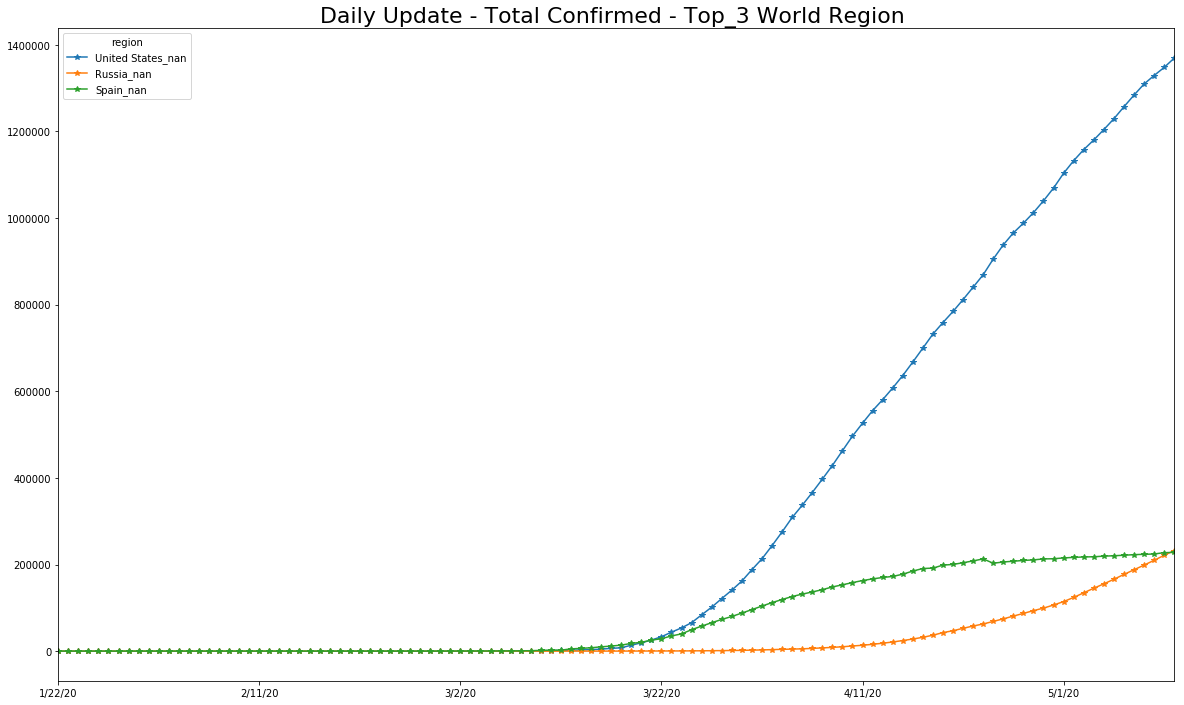

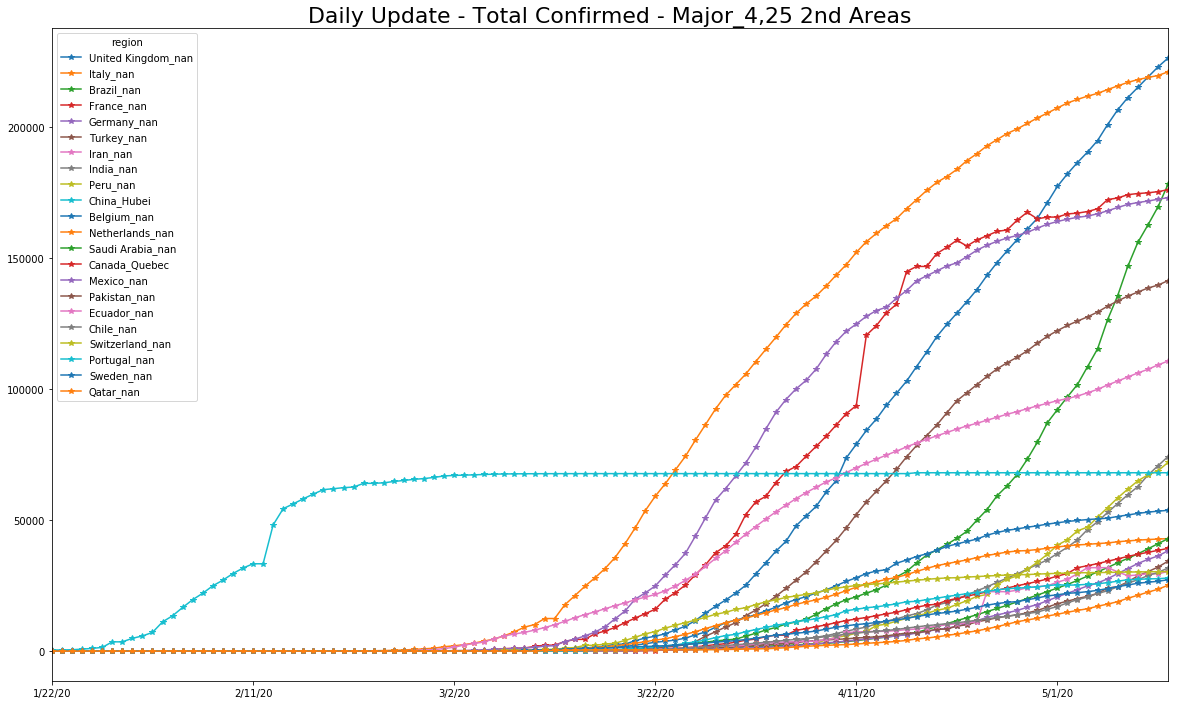

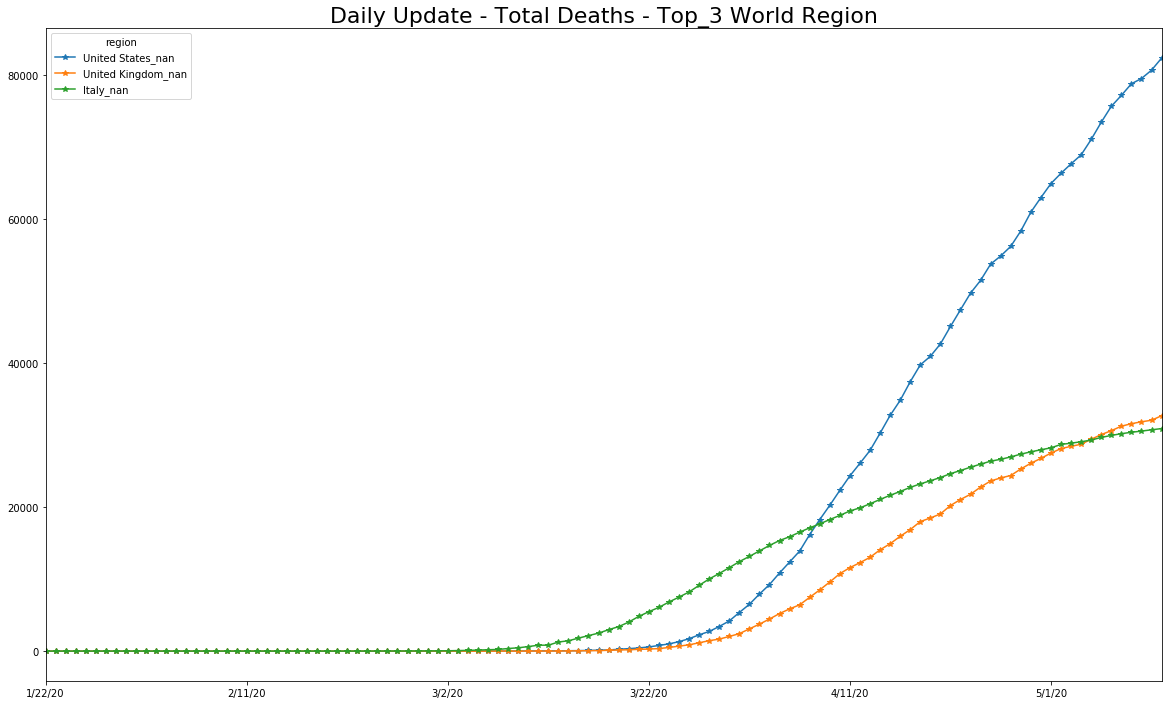

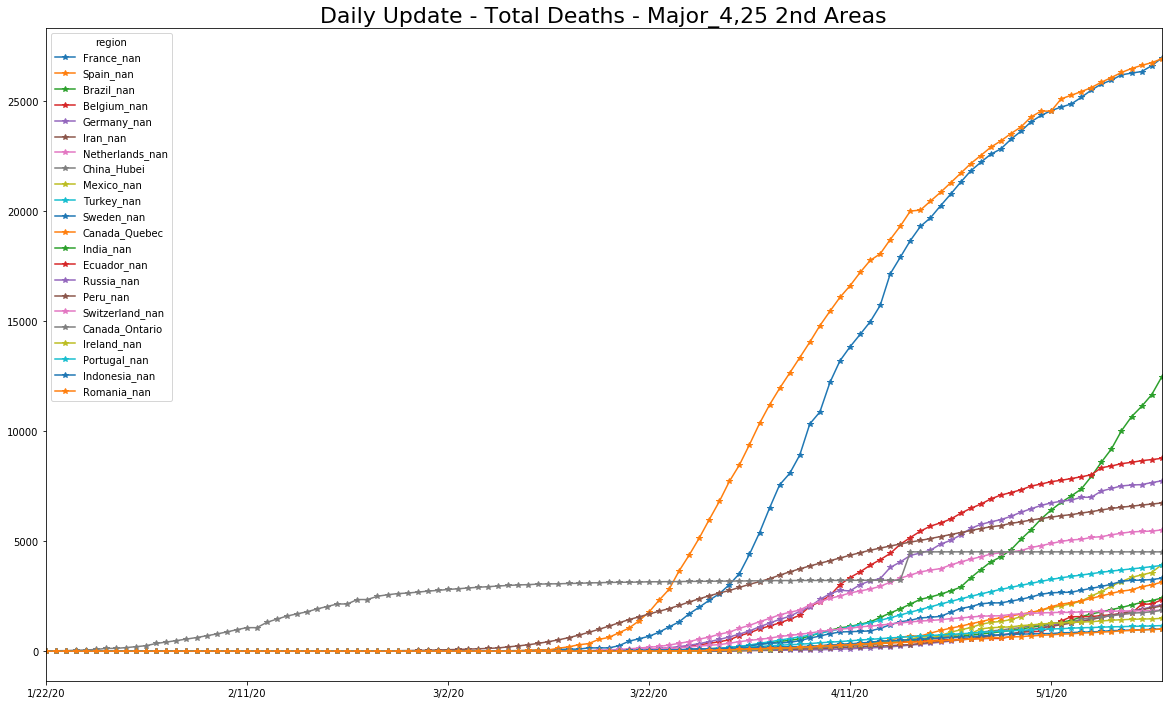

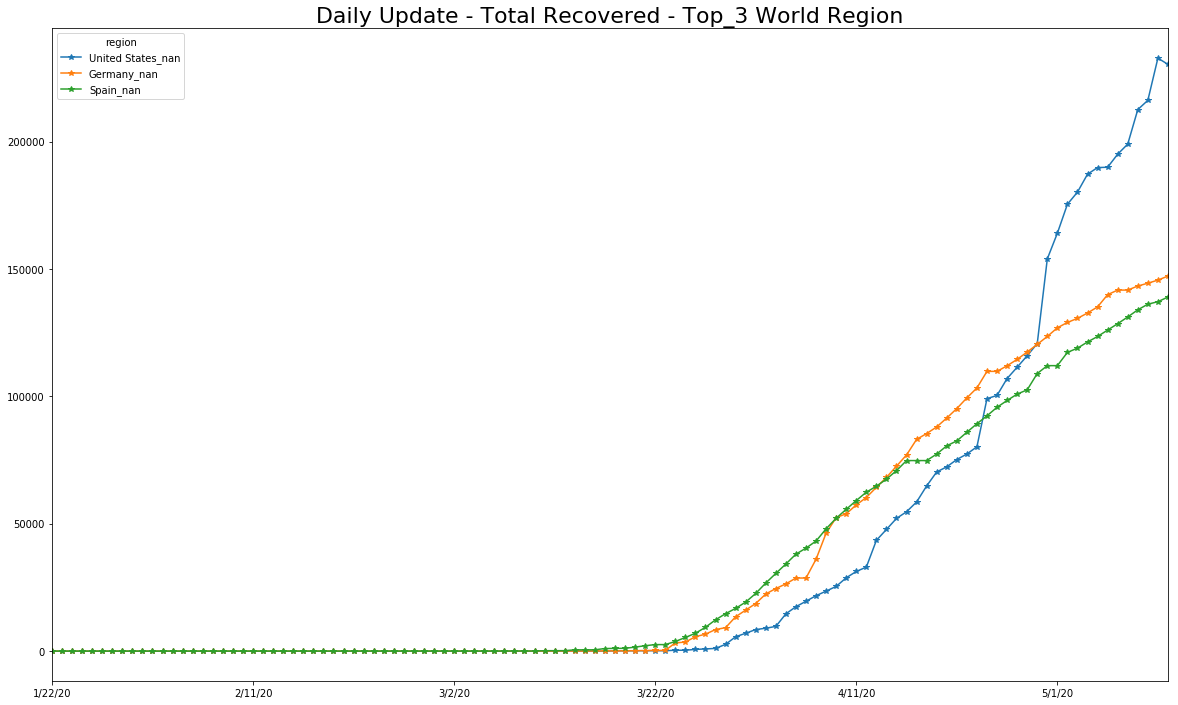

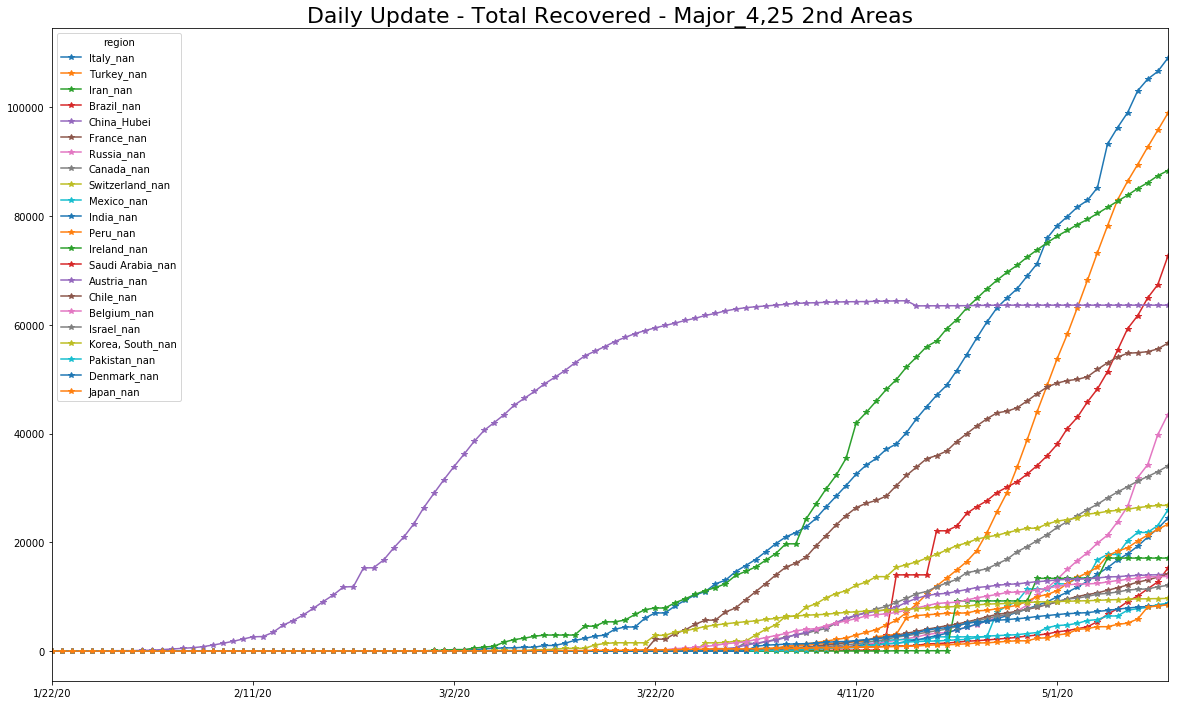

In [15]:
#
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts_d.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts_rec.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [16]:
#!pip install pyweatherbit
#
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime
#
#api_key="46f953cbca334ea1b85ab5d47dbc9aa0" # joao@fuelbigdata.com
api_key="27a4e12ebc7f41b2bd6e300015f1a090" # jpacerqueira.consult.bigdata@gmail.com
#

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [17]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      #  'Australia_Queensland',
      #  'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      #  'Cambodia_nan',
      #  'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      #  'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      #  'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
    #   'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Taiwan*_nan',
        'Turkey_nan', 
        'Vietnam_nan',
       ]
#

#### Weather History

In [18]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=len(confirmed.iloc[1])-1 #90# 89 #88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_weather_fetch_list= my_train_list # ['Canada_Quebec'] #  ['Iran_nan'] #['Brazil_nan'] #

start_date_init=pd.to_datetime('today').strftime('%Y/%m/%d') # '2020-04-18'
print('start_date_init=',start_date_init)
offset_days=-1 # -1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=1 #1

w=pd.DataFrame(columns=['date','region','min','max'])
for h in range(0,max_days):
    offset_days=h
    start_date=pd.to_datetime(start_date_init)
    #
    end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
    start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
    prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
    prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
    #
    for i in range (1,len(confirmed)):
        if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
            continue
        if confirmed.iloc[i,vpos] in my_weather_fetch_list:
            #
            # Clean JSON structure return from API Call
            jas=""
            jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
            if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                 or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                continue
            try:
                w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
            except Exception:
                w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
#        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan
start_date_init= 2020/05/13


HTTPError: 403 Client Error: Forbidden for url: https://api.weatherbit.io/v2.0/history/daily?key=27a4e12ebc7f41b2bd6e300015f1a090&lat=-33.8688&lon=151.2093&start_date=2020-05-13&end_date=2020-05-14

In [19]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [20]:
w[:]

Empty DataFrame
Columns: [date, region, min, max]
Index: []

## Kalman Filter With R

In [21]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan, Feb < 26/02 as
### they are too in the Past and model no longuer trains in China Hubei only!

ts=ts[35:]
ts_d=ts_d[35:]
ts_rec=ts_rec[35:]

In [22]:
ts[:3]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
2/26/20                1            0            1            0           0   
2/27/20                1            0            1            0           0   
2/28/20                1            0            1            0           0   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
2/26/20                        0              0            0   
2/27/20                        0              0            0   
2/28/20                        0              0            0   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
2/26/20                                       0                          4   
2/27/20                                       0                          4   
2/28/20                                       0                          4   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
2/26/20  ...                 57            0               0              0   
2/27/20  ...                 58            0               0              0   
2/28/20  ...                 60            0               0              0   

region   Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
2/26/20           16                       0                   0          0   
2/27/20           16                       0                   0          0   
2/28/20           16                       0                   0          0   

region   Zambia_nan  Zimbabwe_nan  
2/26/20           0             0  
2/27/20           0             0  
2/28/20           0             0  

[3 rows x 266 columns]

In [23]:
ts[-4:]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
5/9/20              4033          856         5558          754          43   
5/10/20             4402          868         5723          755          45   
5/11/20             4687          872         5891          755          45   
5/12/20             4963          876         6067          758          45   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
5/9/20                        25           5776         3175   
5/10/20                       25           6034         3313   
5/11/20                       25           6278         3392   
5/12/20                       25           6563         3538   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
5/9/20                                      107                       3053   
5/10/20                                     107                       3053   
5/11/20                                     107                       3053   
5/12/20                                     107                       3059   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
5/9/20   ...            1309550          702            2349            402   
5/10/20  ...            1329260          707            2418            414   
5/11/20  ...            1347881          711            2486            422   
5/12/20  ...            1369376          717            2519            423   

region   Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
5/9/20           288                     375                   6         34   
5/10/20          288                     375                   6         51   
5/11/20          288                     375                   6         56   
5/12/20          288                     375                   6         65   

region   Zambia_nan  Zimbabwe_nan  
5/9/20          252            35  
5/10/20         267            36  
5/11/20         267            36  
5/12/20         441            36  

[4 rows x 266 columns]

In [24]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [25]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')

Sys.setenv(TZ='GMT')
Sys.timezone()

[1] "GMT"


In [26]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  date = col_date(format = "")
)

R[write to console]: See spec(...) for full column specifications.



In [27]:
p=%R pred_all

In [28]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [29]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w_v2_v2=pd.read_csv('data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w_v2_v227=pd.read_csv('data/w_v2_v227.csv', sep=',', encoding='latin1')
w_v2_v227['date']=pd.to_datetime(w_v2_v227['date'],format='%Y/%m/%d')

w=pd.read_csv('data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Append Weather fetched now to file w_v2_v2
w_n_forward=w_v2_v2.append(w_v2_v227) 
w_n_forward=w_n_forward.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_n_forward=w_n_forward.sort_values(by=['region','date'], ascending=True)
w_n_forward.to_csv(r'data/w_v2_v2.csv', index = False, header=True)

In [30]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2).append(w_v2_v227) 
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [31]:
w_in_model=pd.read_csv('data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [32]:
w_in_model.tail(2)

date       region   min   max
6899 2020-05-10  Vietnam_nan  26.9  33.0
6900 2020-05-11  Vietnam_nan  25.0  33.0

### Build Train Set Data Structure

In [33]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [34]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-2,2]*100 -1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-4,2]*100 -1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-8,2]*100 -1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=(((train['last_day'] +1)*100)/((train['population'] +1)*100000) *10) # *100 - % converter
 #
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [35]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
1     2020-02-27  Afghanistan_nan          1             0             0   
2     2020-02-28  Afghanistan_nan          1             0             0   
3     2020-02-29  Afghanistan_nan          1             0             0   
4     2020-03-01  Afghanistan_nan          1             0             0   
5     2020-03-02  Afghanistan_nan          1             0             0   
6     2020-03-03  Afghanistan_nan          1             0             0   
7     2020-03-04  Afghanistan_nan          1             0             0   
8     2020-03-05  Afghanistan_nan          1             0             0   
9     2020-03-06  Afghanistan_nan          1             0             0   
10    2020-03-07  Afghanistan_nan          1             0             0   
11    2020-03-08  Afghanistan_nan          4             0             0   
12    2020-03-09  Afghanistan_nan          4             3             3   
13    2020-03-10  Afghanistan_nan          5             0             3   
14    2020-03-11  Afghanistan_nan          7             1             4   
15    2020-03-12  Afghanistan_nan          7             2             3   
16    2020-03-13  Afghanistan_nan          7             0             3   
17    2020-03-14  Afghanistan_nan         11             0             2   
18    2020-03-15  Afghanistan_nan         16             4             4   
19    2020-03-16  Afghanistan_nan         21             5             9   
20    2020-03-17  Afghanistan_nan         22             5            14   
21    2020-03-18  Afghanistan_nan         22             1            11   
22    2020-03-19  Afghanistan_nan         22             0             6   
23    2020-03-20  Afghanistan_nan         24             0             1   
24    2020-03-21  Afghanistan_nan         24             2             2   
25    2020-03-22  Afghanistan_nan         40             0             2   
26    2020-03-23  Afghanistan_nan         40            16            18   
27    2020-03-24  Afghanistan_nan         74             0            16   
28    2020-03-25  Afghanistan_nan         84            34            50   
29    2020-03-26  Afghanistan_nan         94            10            44   
30    2020-03-27  Afghanistan_nan        110            10            54   
...          ...              ...        ...           ...           ...   
20874 2020-04-14     Zimbabwe_nan         17             3             4   
20875 2020-04-15     Zimbabwe_nan         23             0             3   
20876 2020-04-16     Zimbabwe_nan         23             6             9   
20877 2020-04-17     Zimbabwe_nan         24             0             6   
20878 2020-04-18     Zimbabwe_nan         25             1             7   
20879 2020-04-19     Zimbabwe_nan         25             1             2   
20880 2020-04-20     Zimbabwe_nan         25             0             2   
20881 2020-04-21     Zimbabwe_nan         28             0             1   
20882 2020-04-22     Zimbabwe_nan         28             3             3   
20883 2020-04-23     Zimbabwe_nan         28             0             3   
20884 2020-04-24     Zimbabwe_nan         29             0             3   
20885 2020-04-25     Zimbabwe_nan         31             1             1   
20886 2020-04-26     Zimbabwe_nan         31             2             3   
20887 2020-04-27     Zimbabwe_nan         32             0             3   
20888 2020-04-28     Zimbabwe_nan         32             1             3   
20889 2020-04-29     Zimbabwe_nan         32             0             1   
20890 2020-04-30     Zimbabwe_nan         40             0             1   
20891 2020-05-01     Zimbabwe_nan         40             8             8   
20892 2020-05-02     Zimbabwe_nan         34             0             8   
20893 2020-05-03     Zimbabwe_nan         34            -6             2   
20894 2020-05-04     Zimbabwe_nan         34             0  

In [36]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [37]:
# Joao - Fix - Nulls are an issue

train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
20903 2020-05-13  Zimbabwe_nan          0             0             1   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
20903             2         100.027778         102.885714         105.911765   

       last_day  kalman_prediction  population  infected_rate  min  max  
20903        36               36.0    10000000   3.700000e-08  NaN  NaN

In [38]:
train.to_csv(r'data/train.csv', index = False, header=True)

##Shared -- Ratio in Confirmed - 21Day Forecast -- train 25April2020 - I
ratiod=pd.read_csv('data/train.csv', sep=',', encoding='latin1')
todayd=datetime.today().strftime('%Y-%m-%d')
ratiofn="Shared -- Ratio in Confirmed - "+str(num_days_R_prediction)+"Day Forecast -- train "+todayd+".csv"

ratiod['population_percentage_infected_rate_confirmed']=ratiod['infected_rate']*100
ratiod['population_percentage_factor_9.8_10_infected_rate_confirmed']=ratiod['infected_rate']*100*9.8
ratiod['delta_new_cases']=ratiod['kalman_prediction']-ratiod['last_day']
ratiod['delta_new_cases_per_1M_hab']=ratiod['delta_new_cases']/ratiod['population']*1000000

ratiod.to_csv(r'data/'+ratiofn, index = False, header=True)

ratiod[-3:]

date        region  confirmed  1_day_change  3_day_change  \
20901  2020-05-11  Zimbabwe_nan         36             1             2   
20902  2020-05-12  Zimbabwe_nan         36             0             2   
20903  2020-05-13  Zimbabwe_nan          0             0             1   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
20901             2         102.885714         105.911765         105.911765   
20902             2         100.027778         105.911765         105.911765   
20903             2         100.027778         102.885714         105.911765   

       last_day  kalman_prediction  population  infected_rate  min  max  \
20901        36               35.0    10000000   3.700000e-08  NaN  NaN   
20902        36               36.0    10000000   3.700000e-08  NaN  NaN   
20903        36               36.0    10000000   3.700000e-08  NaN  NaN   

       population_percentage_infected_rate_confirmed  \
20901                                       0.000004   
20902                                       0.000004   
20903                                       0.000004   

       population_percentage_factor_9.8_10_infected_rate_confirmed  \
20901                                           0.000036             
20902                                           0.000036             
20903                                           0.000036             

       delta_new_cases  delta_new_cases_per_1M_hab  
20901             -1.0                        -0.1  
20902              0.0                         0.0  
20903              0.0                         0.0

## Kalman 1 day Prediction with Evaluation

                region           mse           rmse           mae
256  United States_nan  2.533641e+10  159174.160991  22789.116883


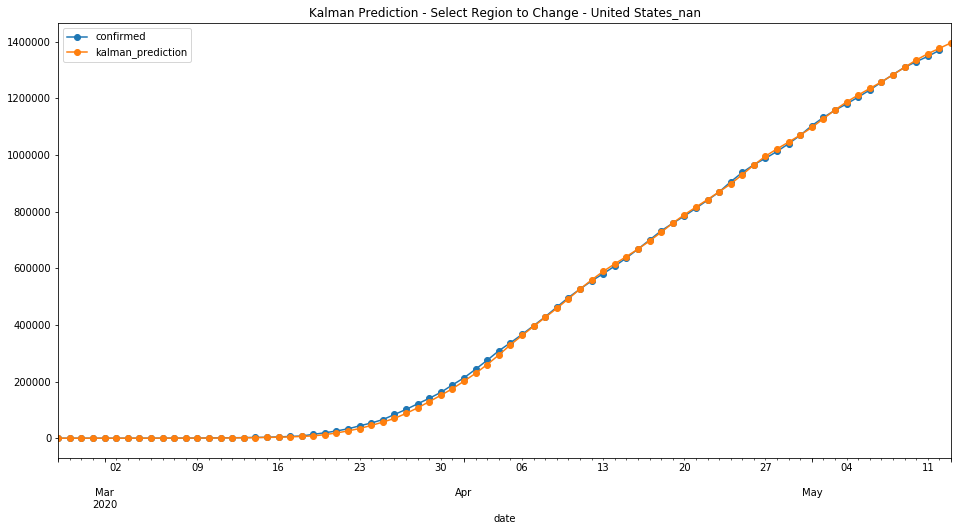

In [39]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse          rmse          mae
208  Russia_nan  7.710147e+08  27767.152183  4143.103896


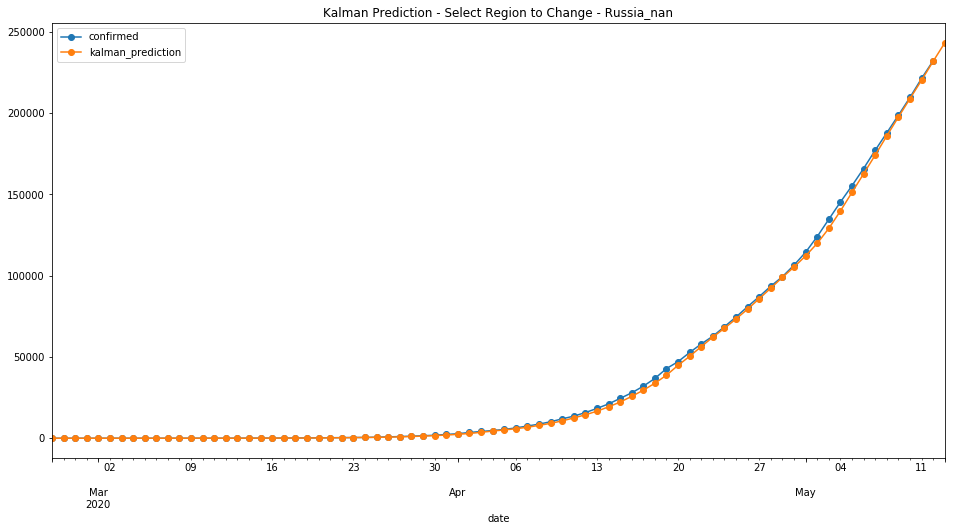

In [40]:
# Select region
region='Russia_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse          rmse          mae
30  Brazil_nan  4.594253e+08  21434.209695  3370.506494


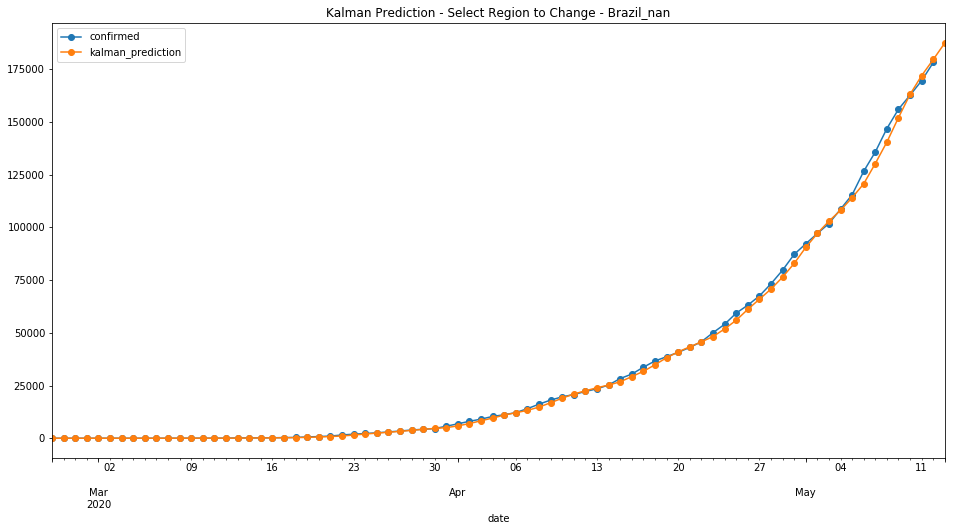

In [41]:
# Select region
region='Brazil_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse          rmse          mae
255  United Kingdom_nan  6.982678e+08  26424.757536  3869.246753


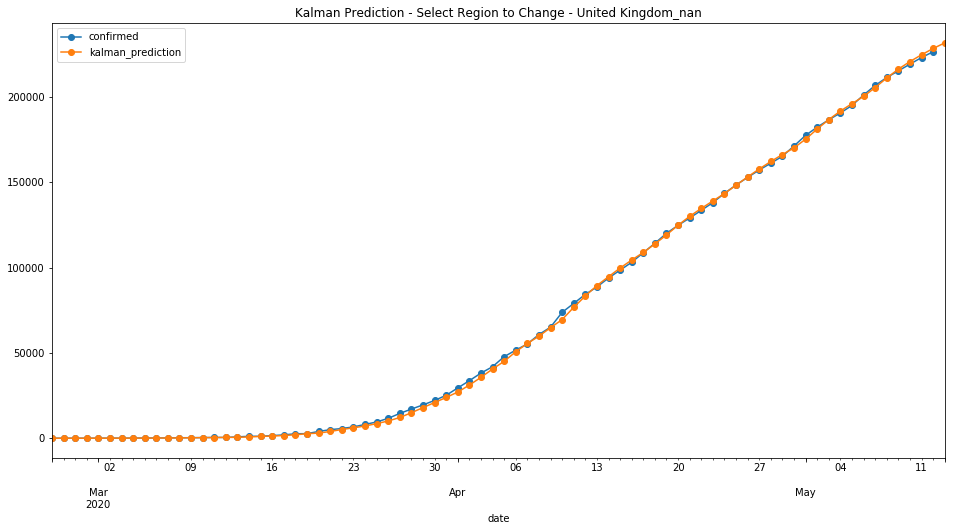

In [42]:
# Select region
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [43]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='3G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpbafi3s7v
  JVM stdout: /tmp/tmpbafi3s7v/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpbafi3s7v/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         01 secs
H2O cluster timezone:       Etc/GMT
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.1
H2O cluster version age:    1 year, 6 months and 16 days !!!
H2O cluster name:           H2O_from_python_unknownUser_zgi08j
H2O cluster total nodes:    1
H2O cluster free memory:    3 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.3 final
--------------------------  ----------------------------------------

In [44]:

train=train.fillna(0)

########################################################

### Joao - Training  progression - When growth happened 2020/03/05 to 2020/04/12
### Joao - FIX - Refresh this daily forward

### Old Fixed manual ### Last run 17April2020
##
#train_df=train[train['date']>'2020-03-04']
#train_df=train[train['date']<'2020-04-16']
#boots=train_df[train_df['date']>='2020-04-08'] # some bootstrap to give more weight for recent days
#train_df=train_df.append([boots[boots['date']>='2020-04-12']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
#region_to_train=my_train_list
#train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
#test=train[train['date']>='2020-04-03']
#test=test[test['date']<'2020-04-17']
#test_v2=test[test['region'].isin(region_to_train)]
#valid_v2=test_v2[test_v2['date']>='2020-04-16']

########################################################

to_day=pd.to_datetime('today')
first_train_date=(to_day+pd.DateOffset(days=-42)).strftime('%Y-%m-%d')
last_train_date=(to_day+pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
first_bootstrap_date=(to_day+pd.DateOffset(days=-9)).strftime('%Y-%m-%d')
boost_bootstrap_date=(to_day+pd.DateOffset(days=-4)).strftime('%Y-%m-%d')
first_test_date=(to_day+pd.DateOffset(days=-10)).strftime('%Y-%m-%d')
last_test_date=to_day.strftime('%Y-%m-%d')
first_valid_date=(to_day+pd.DateOffset(days=-2)).strftime('%Y-%m-%d')

print('first_train_date=',first_train_date)
print('last_train_date=',last_train_date)
print('first_bootstrap_date=',first_bootstrap_date)
print('boost_bootstrap_date=',boost_bootstrap_date)
print('first_test_date=',first_test_date)
print('last_test_date=',last_test_date)
print('first_valid_date=',first_valid_date)

train_df=train[train['date']>first_train_date]
train_df=train[train['date']<last_train_date]
boots=train_df[train_df['date']>=first_bootstrap_date] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>=boost_bootstrap_date]]*5,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>first_test_date]
test=test[test['date']<=last_test_date]
test_v2=test[test['region'].isin(region_to_train)]
valid_v2=test_v2[test_v2['date']>=first_valid_date]


first_train_date= 2020-04-01
last_train_date= 2020-05-12
first_bootstrap_date= 2020-05-04
boost_bootstrap_date= 2020-05-09
first_test_date= 2020-05-03
last_test_date= 2020-05-13
first_valid_date= 2020-05-11


In [45]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'min', 'max',
            'infected_rate',
            'kalman_prediction'
          #  ,'population_percent_infected_rate_confirmed'
          #  ,'delta_new_cases'
          #  ,'delta_new_cases_per_1M_hab'
          ]

In [46]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [47]:
pred2.iloc[:25]

0  confirmed       date           region
0   2951.0       2894 2020-05-04  Afghanistan_nan
1   3125.0       3224 2020-05-05  Afghanistan_nan
2   3537.0       3392 2020-05-06  Afghanistan_nan
3   3621.0       3563 2020-05-07  Afghanistan_nan
4   3830.0       3778 2020-05-08  Afghanistan_nan
5   4053.0       4033 2020-05-09  Afghanistan_nan
6   4320.0       4402 2020-05-10  Afghanistan_nan
7   4750.0       4687 2020-05-11  Afghanistan_nan
8   4995.0       4963 2020-05-12  Afghanistan_nan
9   5303.0          0 2020-05-13  Afghanistan_nan
10   802.0        803 2020-05-04      Albania_nan
11   809.0        820 2020-05-05      Albania_nan
12   829.0        832 2020-05-06      Albania_nan
13   838.0        842 2020-05-07      Albania_nan
14   848.0        850 2020-05-08      Albania_nan
15   855.0        856 2020-05-09      Albania_nan
16   860.0        868 2020-05-10      Albania_nan
17   874.0        872 2020-05-11      Albania_nan
18   874.0        876 2020-05-12      Albania_nan
19   880.0          0 2020-05-13      Albania_nan
20  4703.0       4648 2020-05-04      Algeria_nan
21  4873.0       4838 2020-05-05      Algeria_nan
22  5074.0       4997 2020-05-06      Algeria_nan
23  5225.0       5182 2020-05-07      Algeria_nan
24  5427.0       5369 2020-05-08      Algeria_nan

In [48]:
pred2.iloc[175:195]

0  confirmed       date          region
175  2340.0       2422 2020-05-09  Azerbaijan_nan
176  2520.0       2519 2020-05-10  Azerbaijan_nan
177  2595.0       2589 2020-05-11  Azerbaijan_nan
178  2665.0       2693 2020-05-12  Azerbaijan_nan
179  2787.0          0 2020-05-13  Azerbaijan_nan
180    82.0         83 2020-05-04     Bahamas_nan
181    82.0         89 2020-05-05     Bahamas_nan
182    89.0         92 2020-05-06     Bahamas_nan
183    91.0         92 2020-05-07     Bahamas_nan
184    92.0         92 2020-05-08     Bahamas_nan
185    92.0         92 2020-05-09     Bahamas_nan
186    92.0         92 2020-05-10     Bahamas_nan
187    91.0         93 2020-05-11     Bahamas_nan
188    92.0         93 2020-05-12     Bahamas_nan
189    92.0          0 2020-05-13     Bahamas_nan
190  3547.0       3533 2020-05-04     Bahrain_nan
191  3718.0       3720 2020-05-05     Bahrain_nan
192  3919.0       3934 2020-05-06     Bahrain_nan
193  4154.0       4199 2020-05-07     Bahrain_nan
194  4455.0       4444 2020-05-08     Bahrain_nan

In [49]:
pred2.iloc[220:240]

0  confirmed       date       region
220  17634.0      17489 2020-05-04  Belarus_nan
221  18367.0      18350 2020-05-05  Belarus_nan
222  19263.0      19255 2020-05-06  Belarus_nan
223  20177.0      20168 2020-05-07  Belarus_nan
224  21082.0      21101 2020-05-08  Belarus_nan
225  22020.0      22052 2020-05-09  Belarus_nan
226  22982.0      22973 2020-05-10  Belarus_nan
227  23892.0      23906 2020-05-11  Belarus_nan
228  24825.0      24873 2020-05-12  Belarus_nan
229  25805.0          0 2020-05-13  Belarus_nan
230  50347.0      50267 2020-05-04  Belgium_nan
231  50608.0      50509 2020-05-05  Belgium_nan
232  50763.0      50781 2020-05-06  Belgium_nan
233  50971.0      51420 2020-05-07  Belgium_nan
234  51772.0      52011 2020-05-08  Belgium_nan
235  52362.0      52596 2020-05-09  Belgium_nan
236  52936.0      53081 2020-05-10  Belgium_nan
237  53365.0      53449 2020-05-11  Belgium_nan
238  53698.0      53779 2020-05-12  Belgium_nan
239  53999.0          0 2020-05-13  Belgium_nan

In [50]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time


test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

valid_h20_v2=h2o.H2OFrame(valid_v2)

#training_columns = ['region','1_day_change', '3_day_change', '7_day_change','1_day_change_rate','3_day_change_rate','7_day_change_rate','last_day', 'kalman_prediction','infected_rate', 'min', 'max']
training_cols_v2 = ['region']+x_col #+['population_percent_infected_rate_confirmed','delta_new_cases','delta_new_cases_per_1M_hab']
training_columns = training_cols_v2

# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2
model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=23)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2, validation_frame=valid_h20_v2)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%


In [51]:
#Print Model

print('# MSE on the training data = ',model_v2.mse())
print('# MSE on the validation data = ',model_v2.mse(valid=True))
print('# R^2 on the training data = ',model_v2.r2())
print('# R^2 on the validation data',model_v2.r2(valid=True))

# MSE on the training data =  5745492.445355999
# MSE on the validation data =  13647893066.291706
# R^2 on the training data =  0.9997106349386172
# R^2 on the validation data 0.6336174946070126


In [52]:
model_v2.show()

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1589352931869_1


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 5745492.445355999
RMSE: 2396.975687268438
MAE: 446.68838686028033
RMSLE: 0.4996240875004142
Mean Residual Deviance: 5745492.445355999

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 13647893066.291706
RMSE: 116824.19726363073
MAE: 33035.40762233495
RMSLE: 5.819806830210021
Mean Residual Deviance: 13647893066.291706
Scoring History: 


timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse     validation_mae      validation_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------  ------------------  ------------------  ---------------------
     2020-05-13 06:55:38  0.071 sec   0.0                nan                 nan                 nan                  nan                 nan                 nan
     2020-05-13 06:55:38  0.370 sec   1.0                9636.337330599334   1663.2777590067476  92858997.1491023     143672.09705477976  34147.15963774182   20641671472.118053
     2020-05-13 06:55:38  0.454 sec   2.0                7961.474741393928   1374.1532979931403  63385080.057853505   111363.07600273508  34275.817999558225  12401734696.79095
     2020-05-13 06:55:38  0.520 sec   3.0                6664.710527861778   1206.0072532315132  44418366.42019162    117071.70674709836  34180.68424210321   13705784520.678595
     2020-05-13 06:55:38  0.597 sec   4.0                7493.167424774246   1172.5379056008344  56147558.0556979     122119.64364559179  34116.28609359378   14913207364.126328
---  ---                  ---         ---                ---                 ---                 ---                  ---                 ---                 ---
     2020-05-13 06:55:42  4.068 sec   56.0               2871.0931410249186  566.4461056720121   8243175.824440334    108003.3380119315   32021.368571670046  11664721021.719526
     2020-05-13 06:55:42  4.132 sec   57.0               2884.304559158293   564.4520916038128   8319212.789981316    108535.55744804651  32054.43118053172   11779967230.558205
     2020-05-13 06:55:46  8.157 sec   206.0              2571.120437767613   476.38513541479625  6610660.305506323    117194.34063026884  32838.32432844732   13734513475.763481
     2020-05-13 06:55:50  12.178 sec  362.0              2394.1900073114302  451.70174579237965  5732145.7911099065   118099.58320381257  33262.78758167004   13947511552.914246
     2020-05-13 06:55:53  15.657 sec  500.0              2396.975687268438   446.68838686028033  5745492.445355999    116824.19726363073  33035.40762233495   13647893066.291706


See the whole table with table.as_data_frame()
Variable Importances: 


variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
kalman_prediction  9.8682e+15             1                    0.34758
last_day           7.20375e+15            0.729997             0.253732
7_day_change       4.65688e+15            0.471908             0.164026
3_day_change       2.95093e+15            0.299035             0.103939
1_day_change       1.81353e+15            0.183775             0.0638766
region             8.52287e+14            0.086367             0.0300195
infected_rate      6.35105e+14            0.0643588            0.0223698
1_day_change_rate  1.75435e+14            0.0177778            0.00617921
3_day_change_rate  1.16238e+14            0.011779             0.00409416
7_day_change_rate  8.26729e+13            0.00837771           0.00291193
min                2.94502e+13            0.00298436           0.0010373
max                6.65908e+12            0.000674802          0.000234548

In [53]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
modlv2=model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF
modlv2.sort_values('percentage',ascending=False)

variable  relative_importance  scaled_importance  percentage
0   kalman_prediction         9.868195e+15           1.000000    0.347580
1            last_day         7.203752e+15           0.729997    0.253732
2        7_day_change         4.656876e+15           0.471908    0.164026
3        3_day_change         2.950934e+15           0.299035    0.103939
4        1_day_change         1.813529e+15           0.183775    0.063877
5              region         8.522869e+14           0.086367    0.030019
6       infected_rate         6.351047e+14           0.064359    0.022370
7   1_day_change_rate         1.754347e+14           0.017778    0.006179
8   3_day_change_rate         1.162379e+14           0.011779    0.004094
9   7_day_change_rate         8.267290e+13           0.008378    0.002912
10                min         2.945020e+13           0.002984    0.001037
11                max         6.659081e+12           0.000675    0.000235

In [54]:
## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


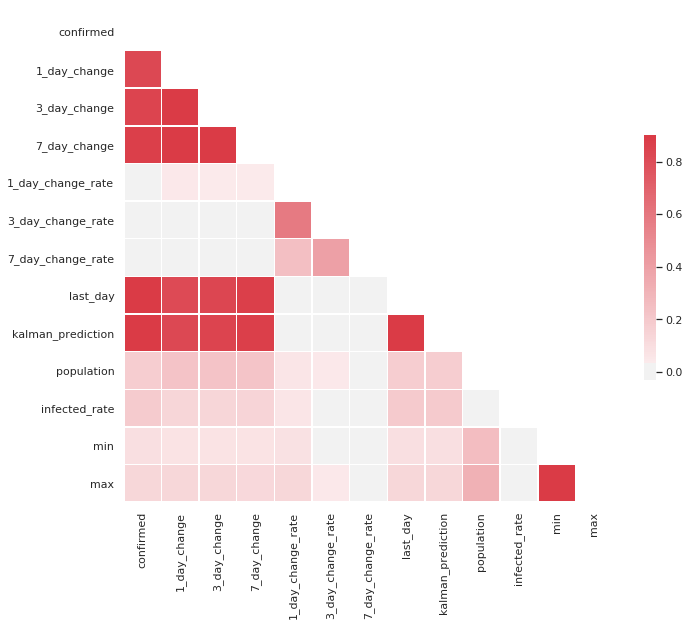

In [55]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [56]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.823333
3_day_change         0.848808
7_day_change         0.873928
1_day_change_rate    0.029074
3_day_change_rate    0.001431
7_day_change_rate   -0.011239
last_day             0.971724
kalman_prediction    0.972409
population           0.181074
infected_rate        0.191576
min                  0.095103
max                  0.128428
Name: confirmed, dtype: float64


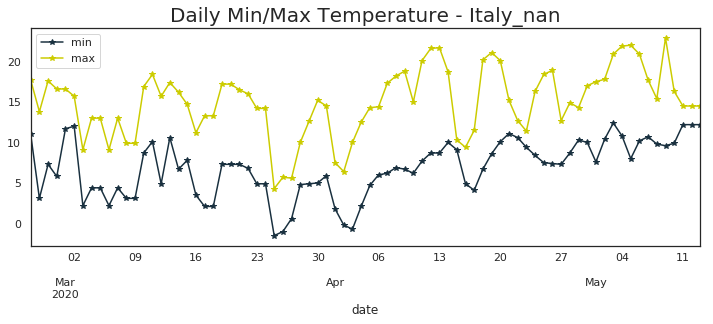

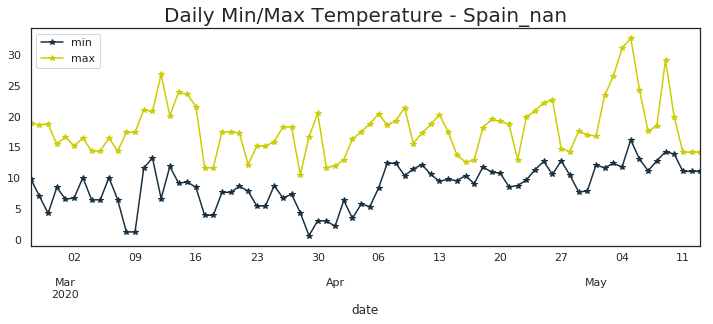

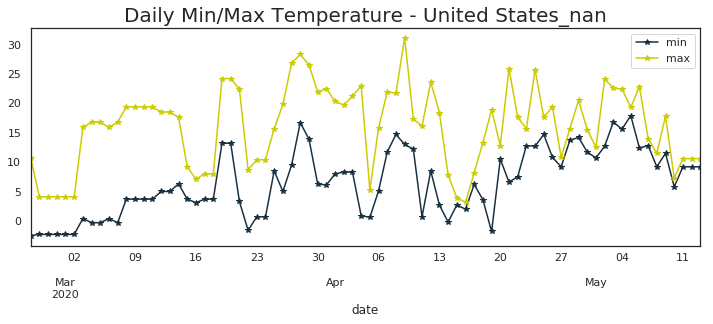

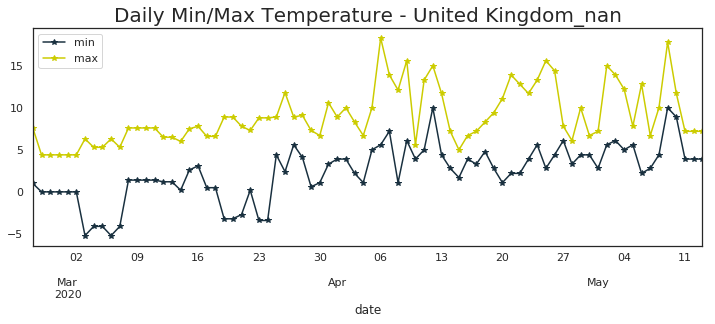

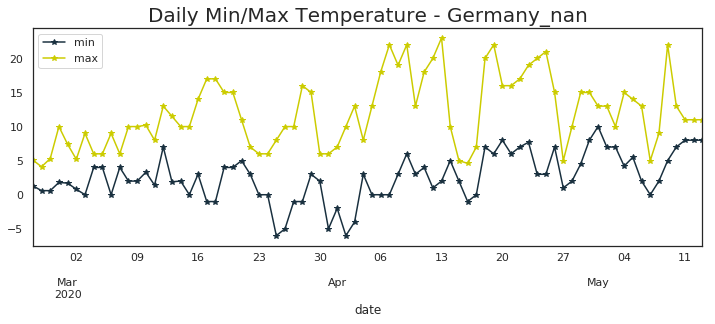

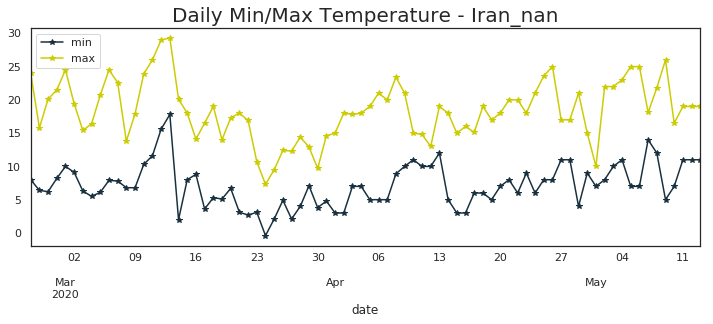

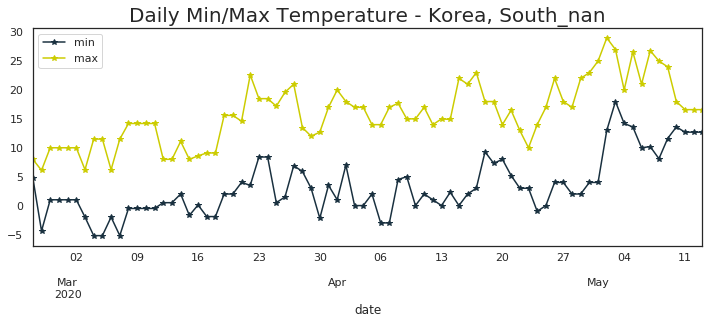

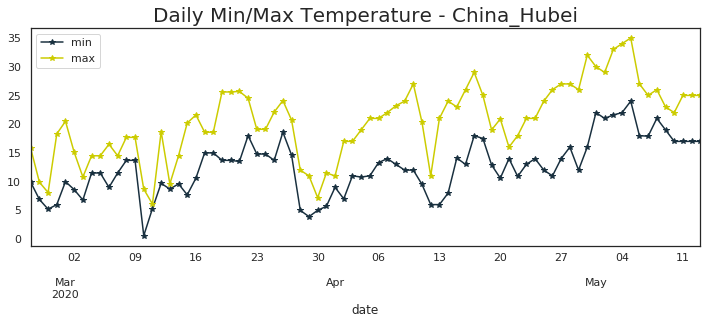

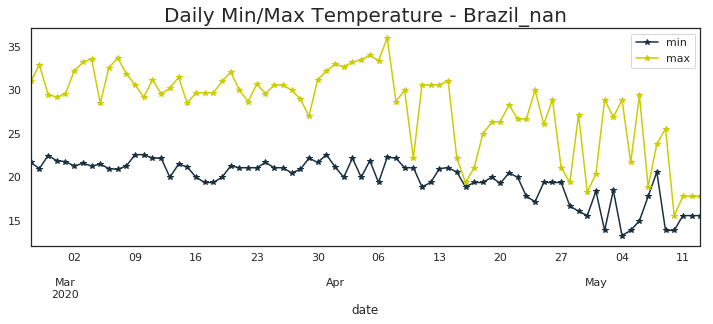

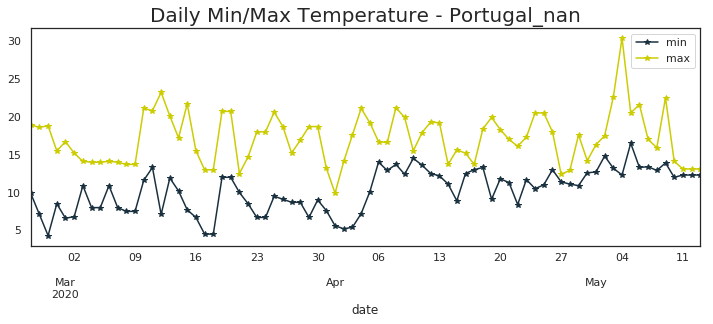

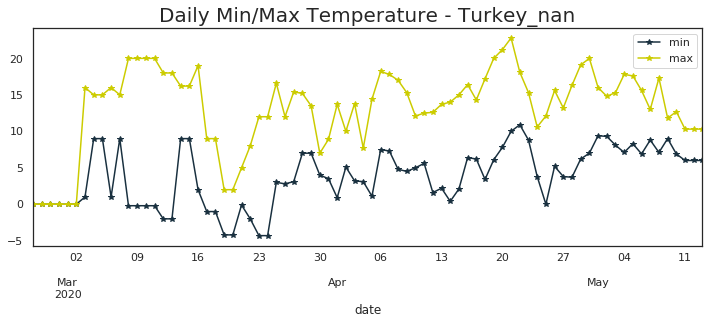

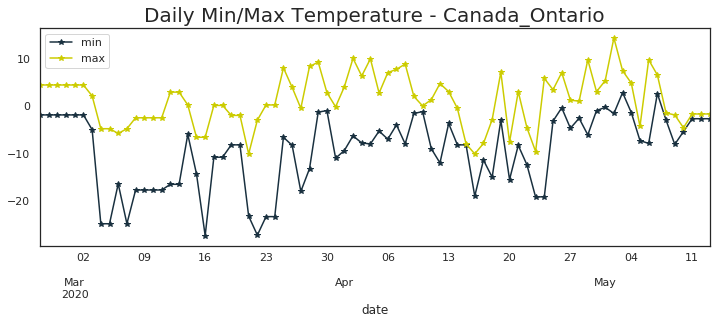

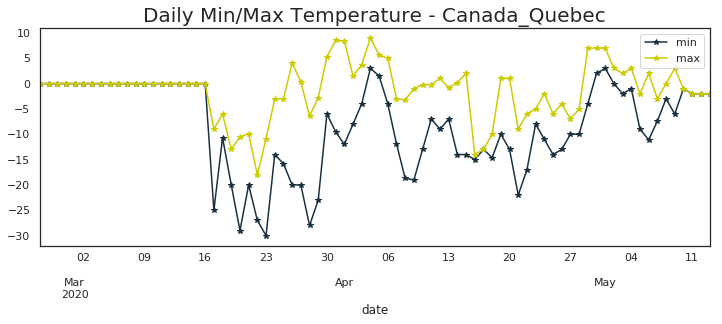

In [57]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan',
          'Korea, South_nan','China_Hubei','Brazil_nan','Portugal_nan','Turkey_nan',
          'Canada_Ontario','Canada_Quebec']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [58]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                             min   max
region                                
United States_nan           17.9  31.1
Russia_nan                  13.0  30.0
Spain_nan                   16.2  32.7
United Kingdom_nan          10.0  18.3
Italy_nan                   12.4  22.9
Brazil_nan                  22.6  36.0
France_nan                  14.2  23.8
Germany_nan                 10.0  23.0
Turkey_nan                  10.9  22.8
Iran_nan                    17.8  29.3
India_nan                   30.0  43.0
Peru_nan                     0.0   0.0
China_Hubei                 24.0  35.0
Belgium_nan                 17.8  26.1
Netherlands_nan             15.6  26.1
Saudi Arabia_nan             0.0   0.0
Canada_Quebec                3.0   9.0
Mexico_nan                   0.0   0.0
Pakistan_nan                15.0  23.7
Ecuador_nan                  0.0   0.0
Chile_nan                    0.0   0.0
Switzerland_nan             12.9  20.1
Portugal_nan                

### Kalman X Days Ahead Prediction

In [59]:
%%R

#install.packages('reshape')

NULL


In [60]:
%%R

require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL

### JOAO - FIX
#
### Flexy Days maximum forward prediction =A Hint!= "Error increases as number of days increases"
days_prediction<-max_days_prediction # Set i days prediction # max_days_prediction=90 days forward prediction with Kalman Filter

for (i in 1: days_prediction) { 
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

cols(
  .default = col_double(),
  date = col_date(format = "")
)




In [61]:
all_new=%R all_new

In [62]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

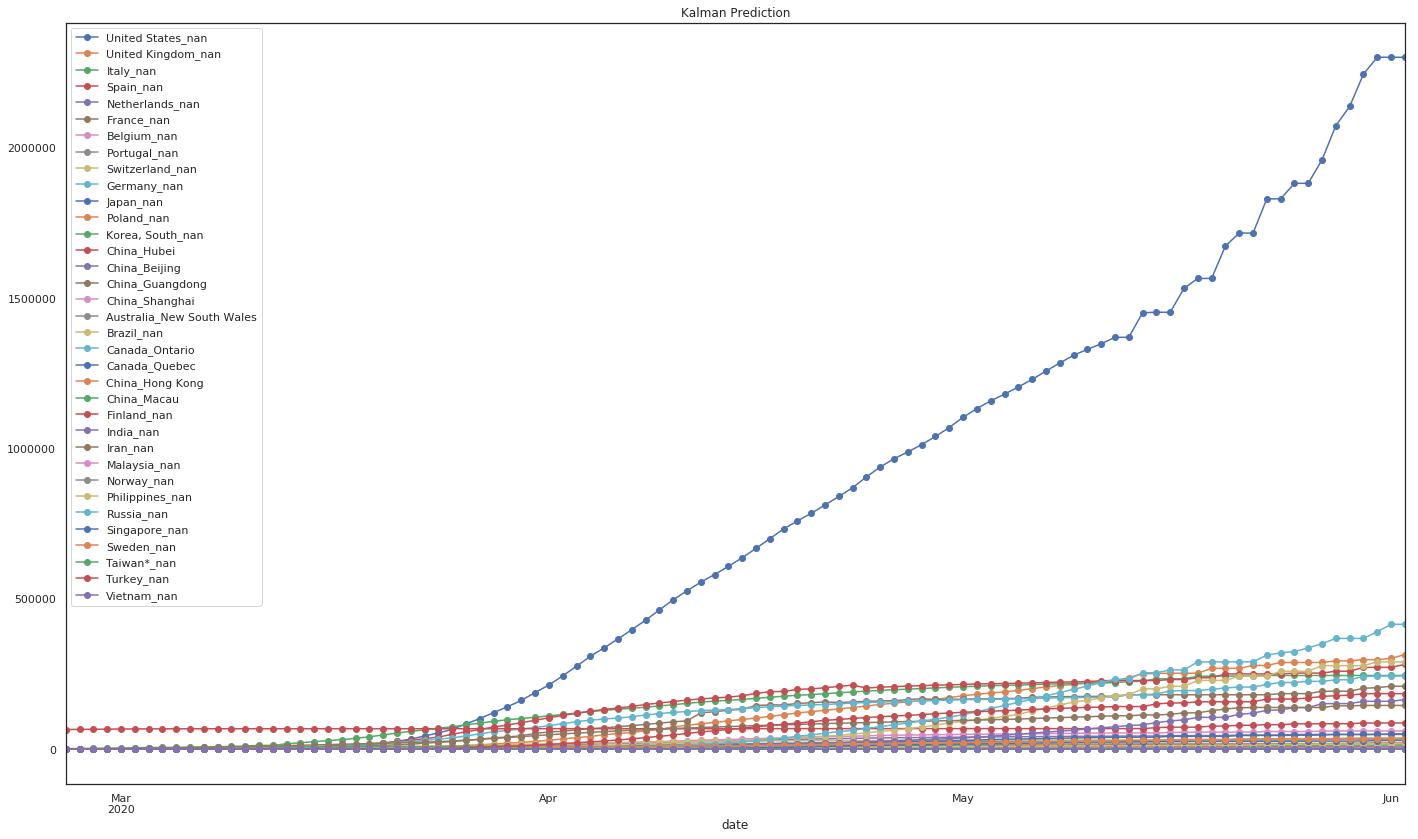

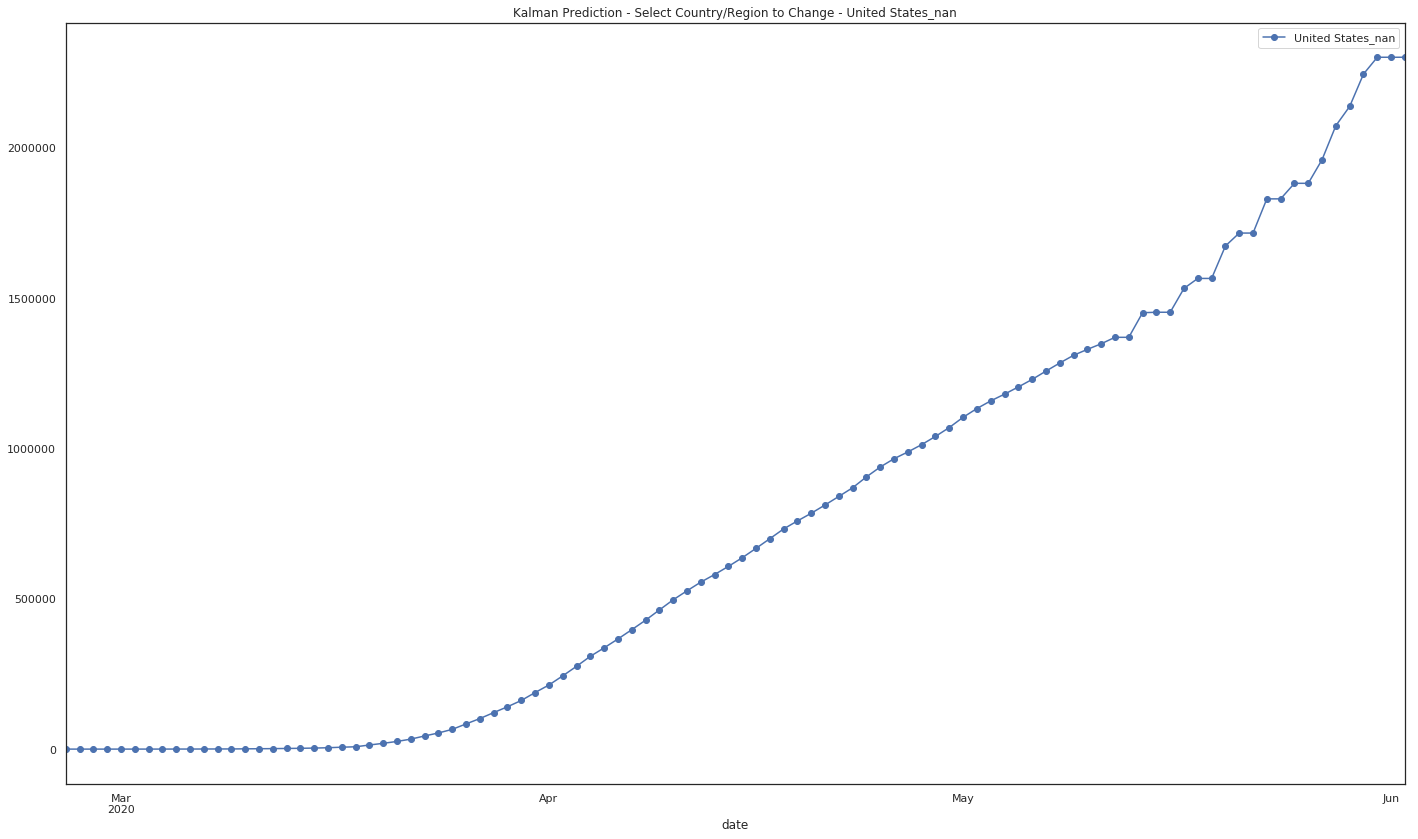

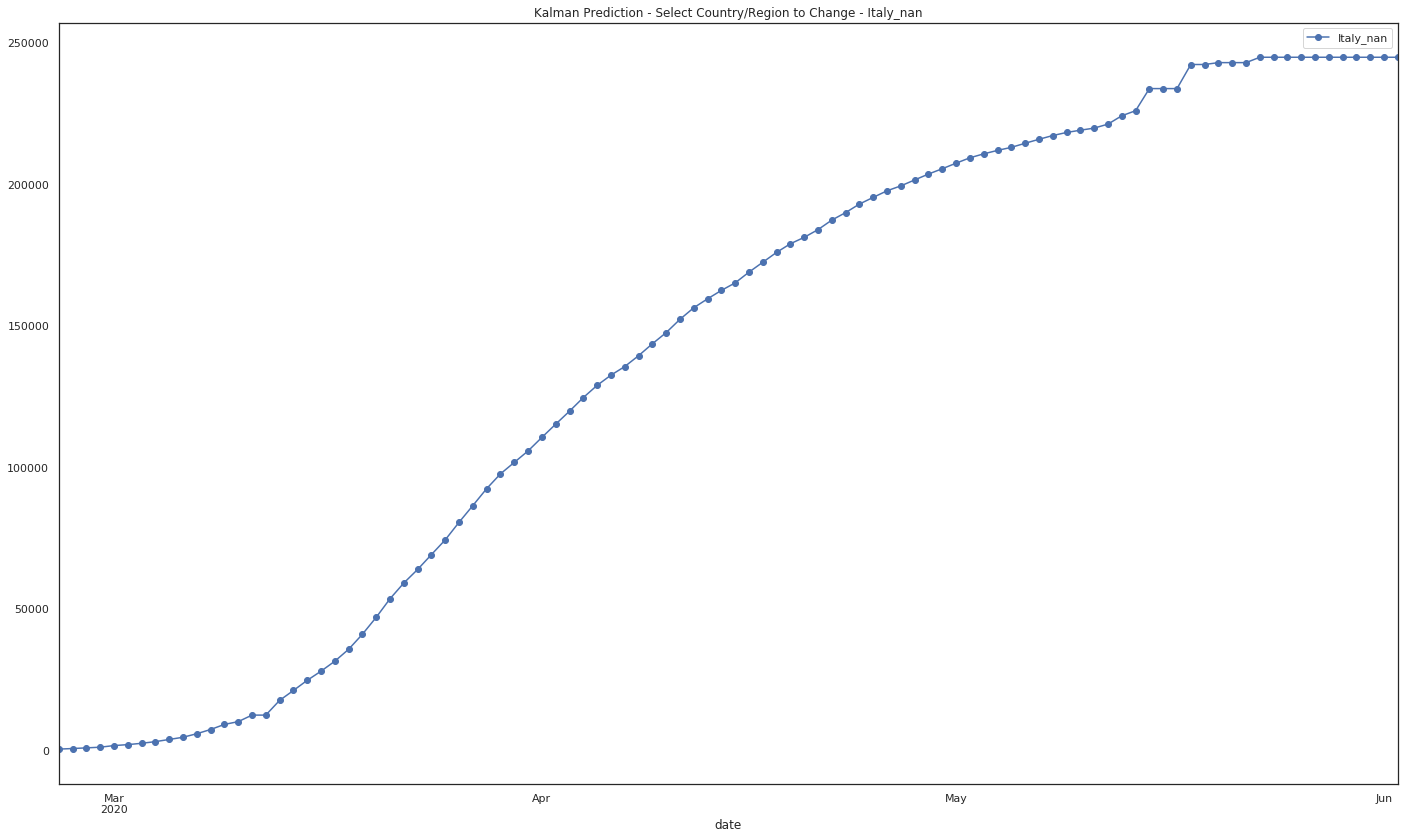

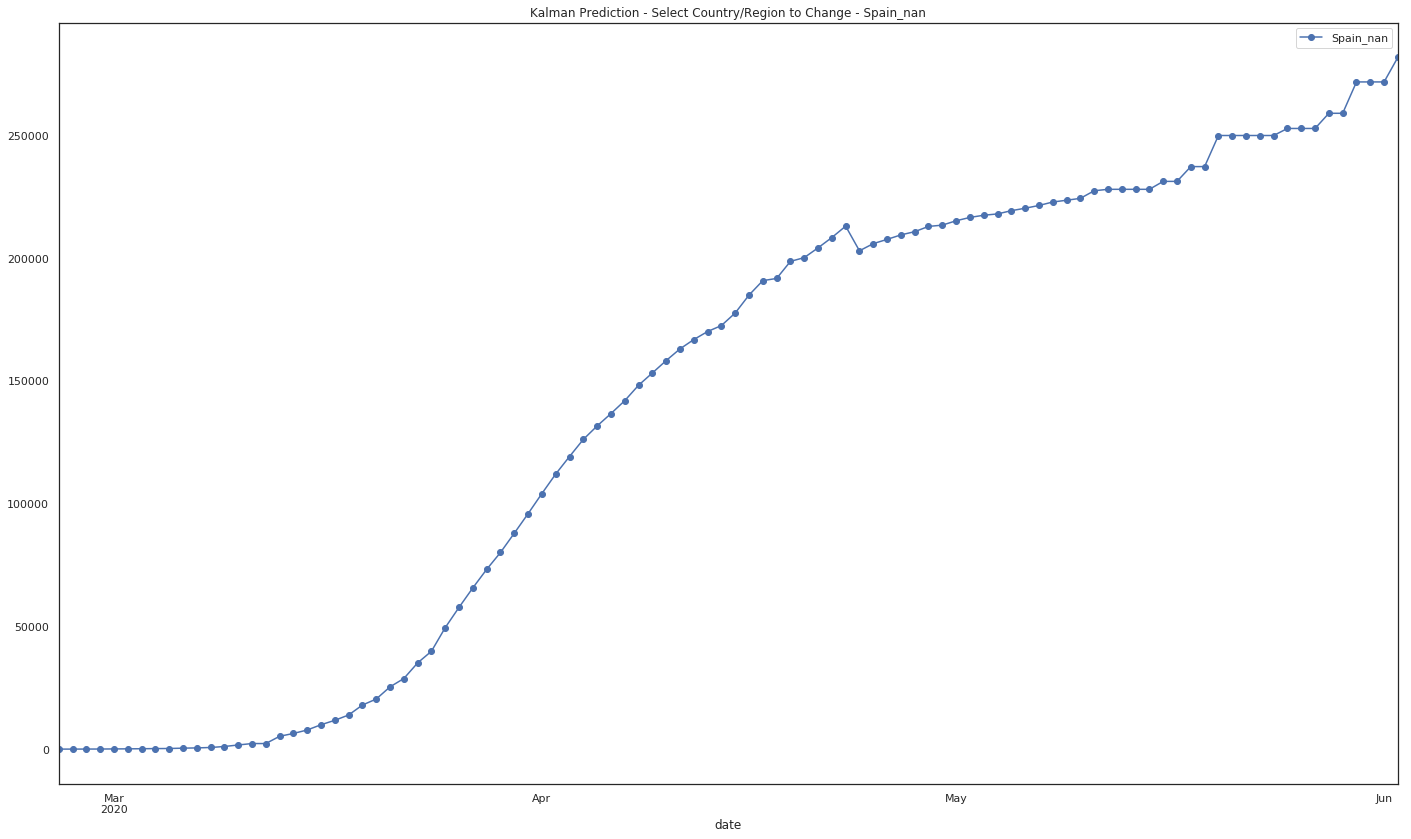

In [63]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


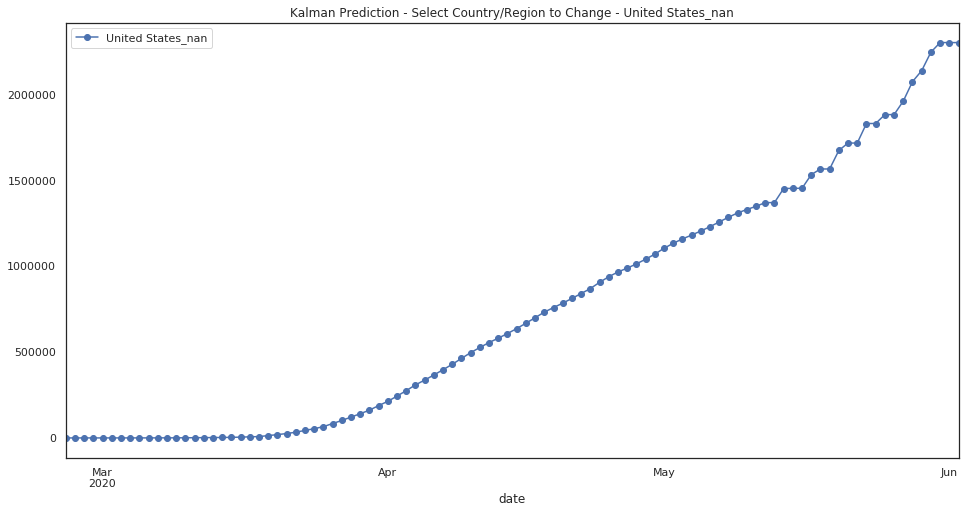

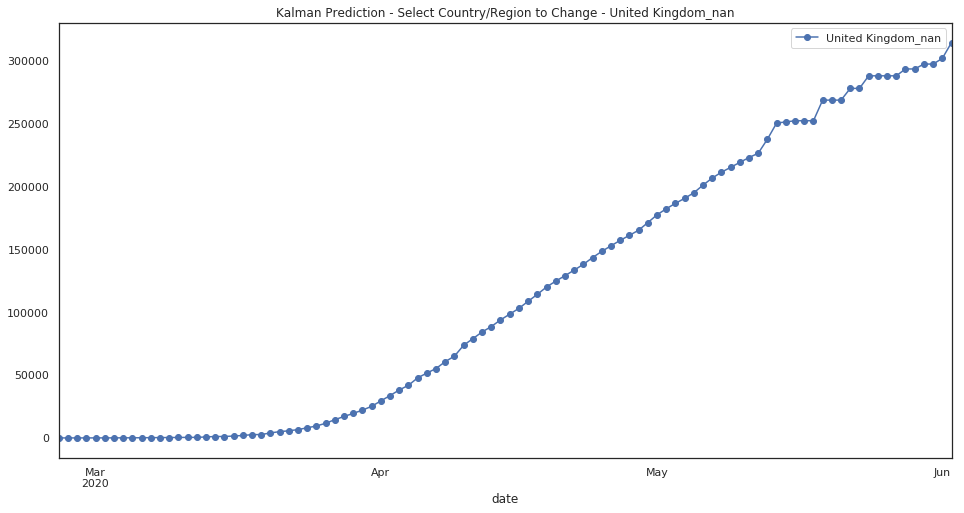

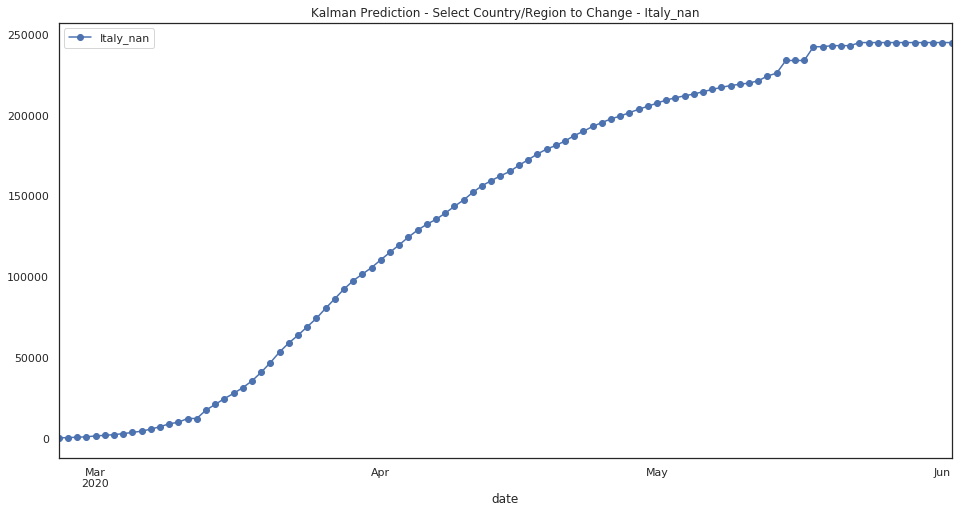

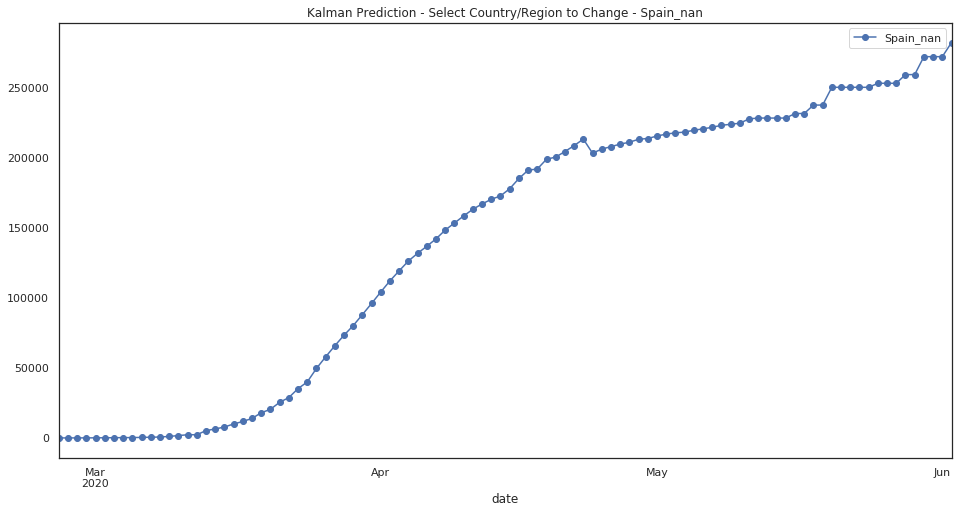

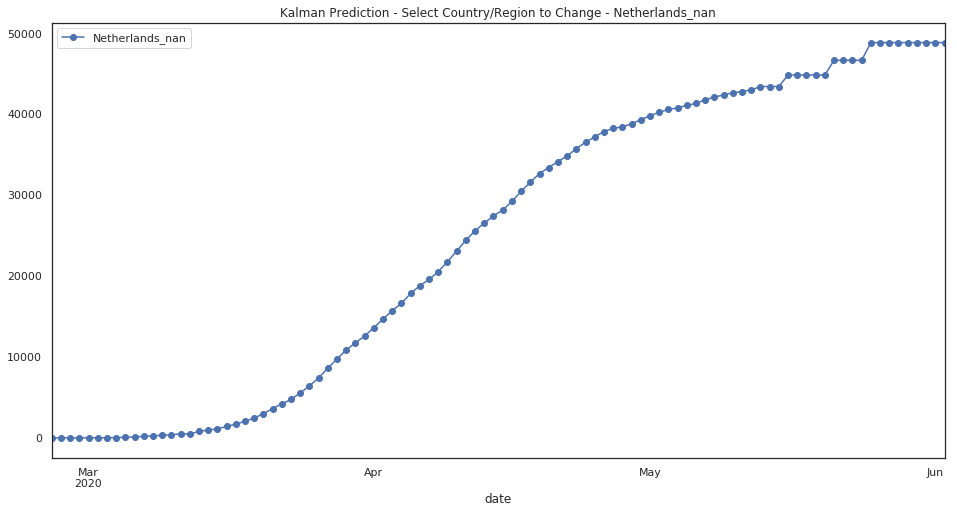

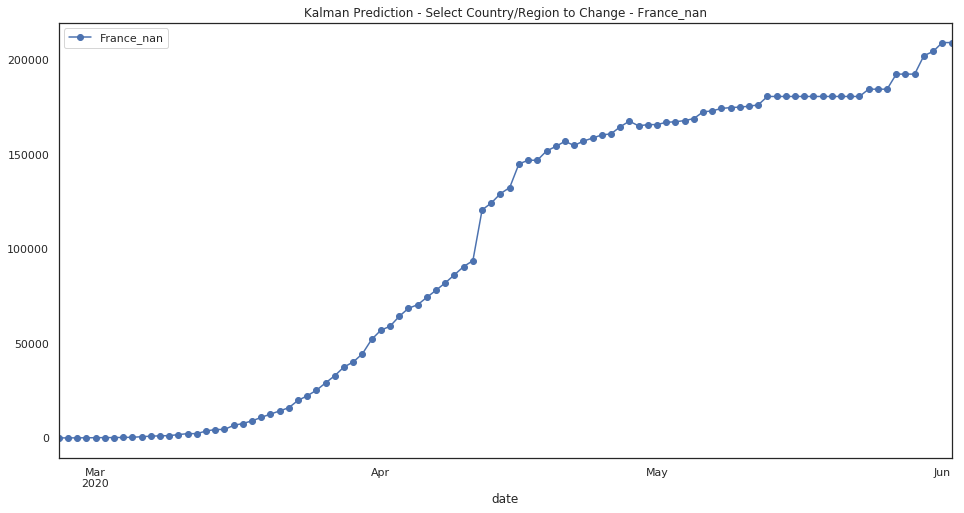

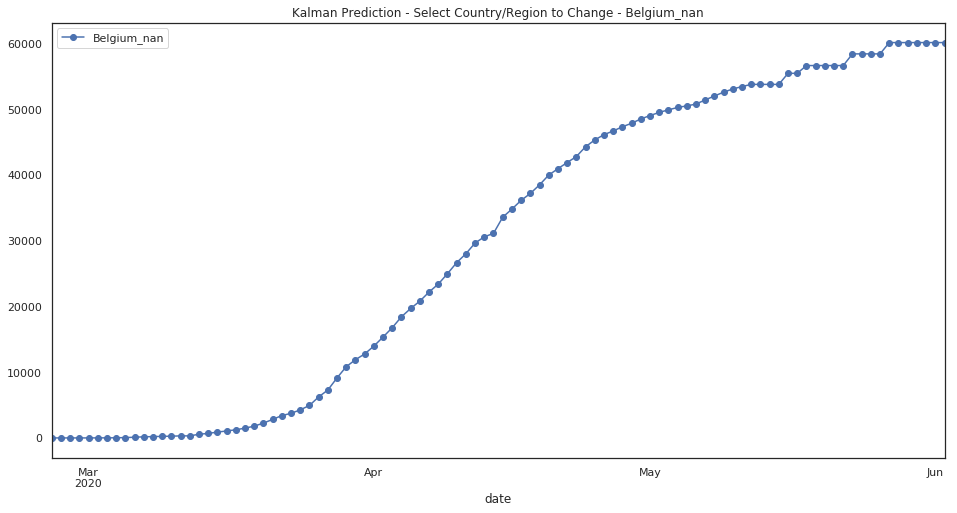

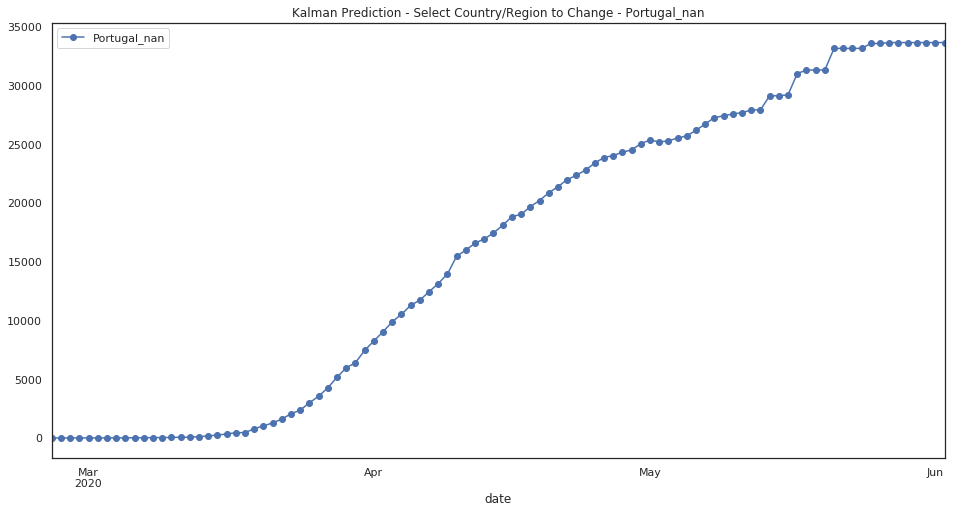

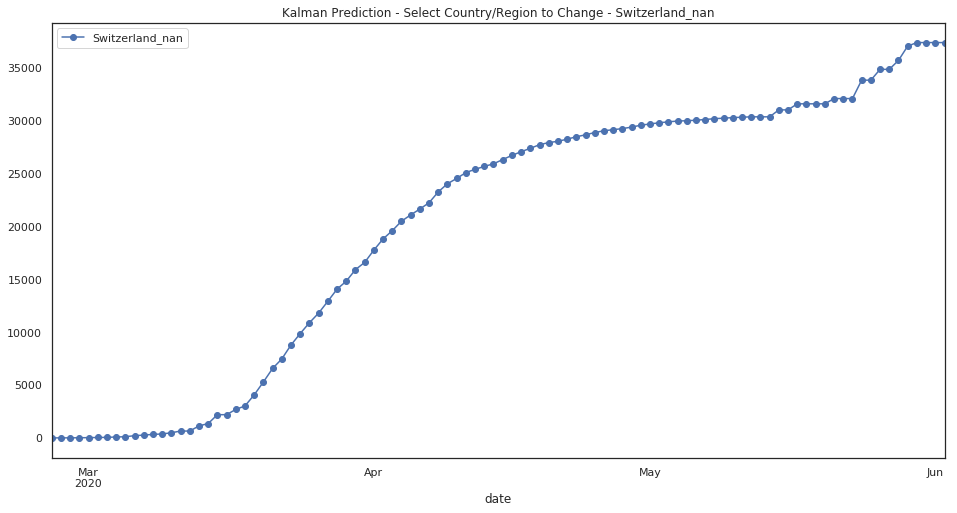

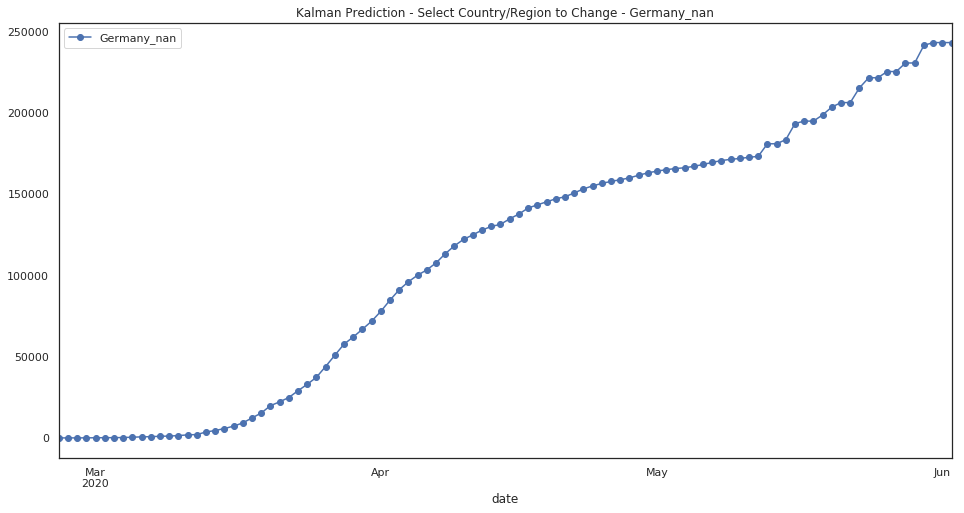

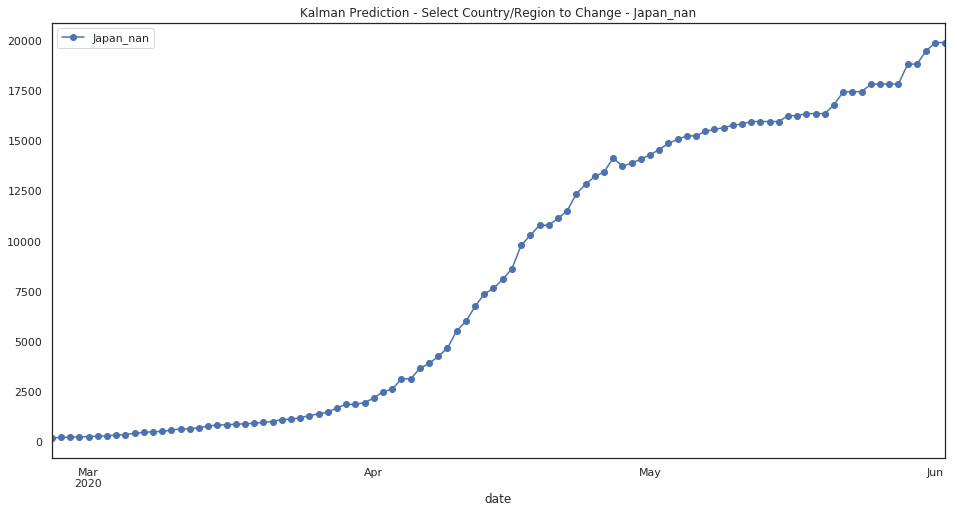

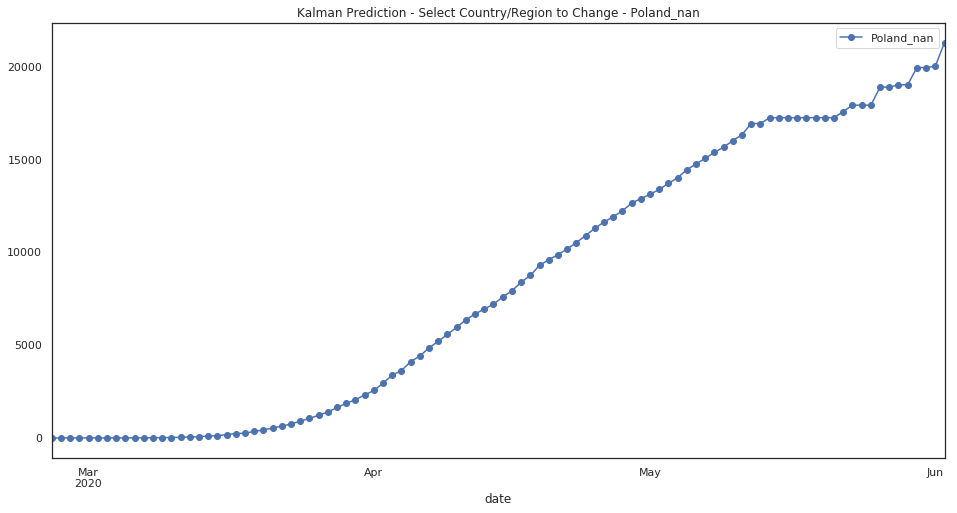

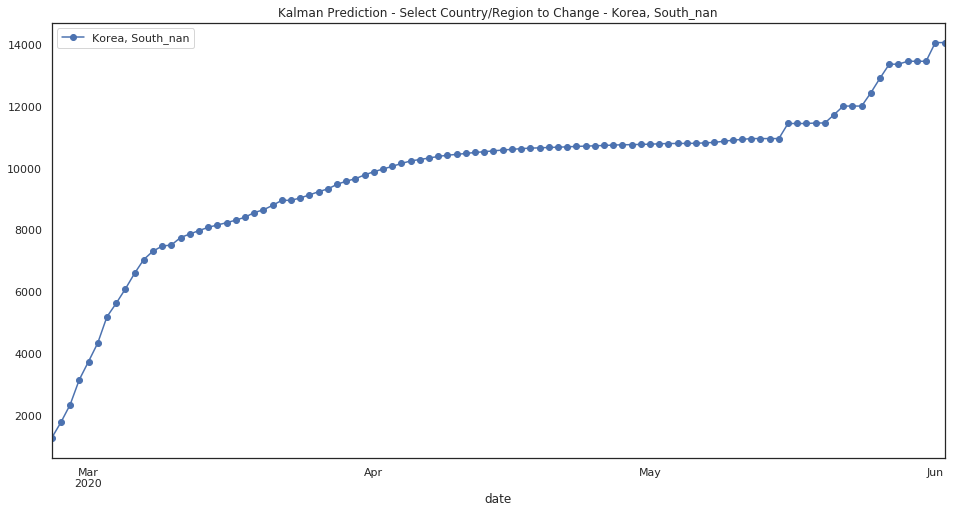

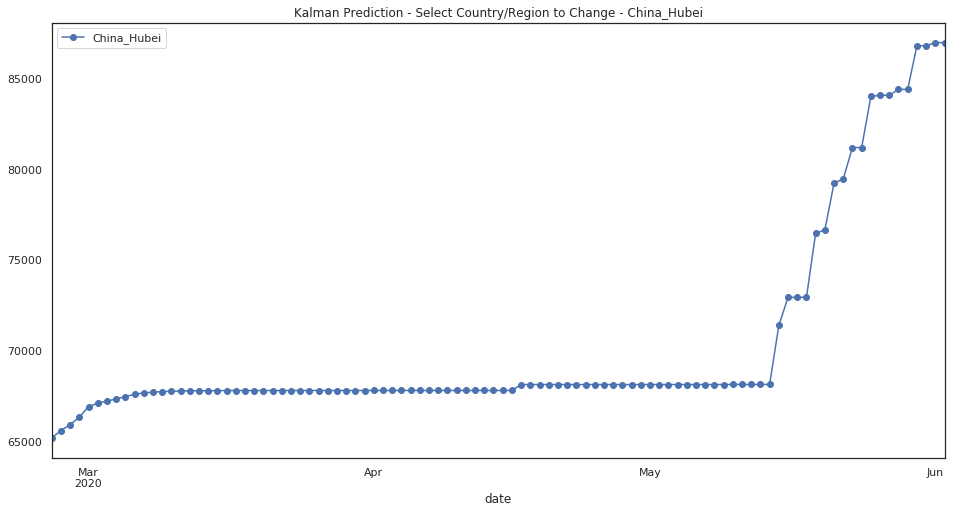

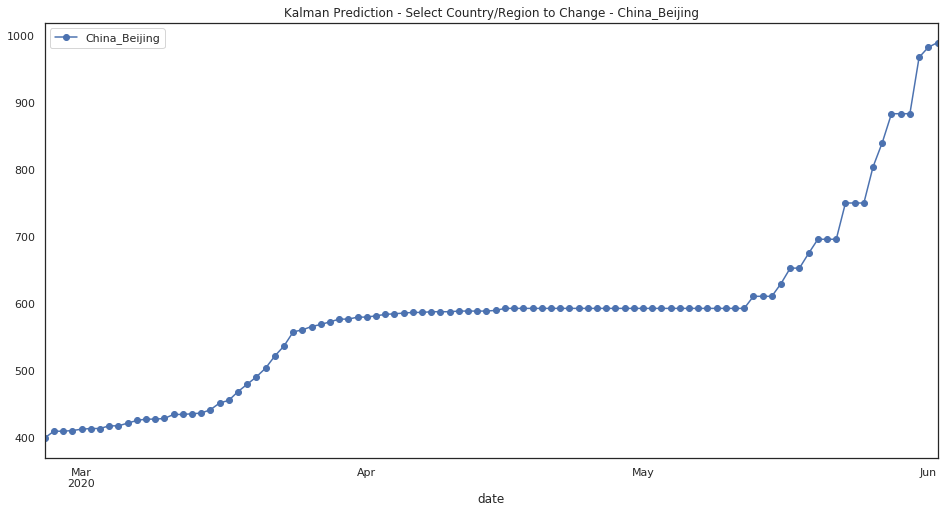

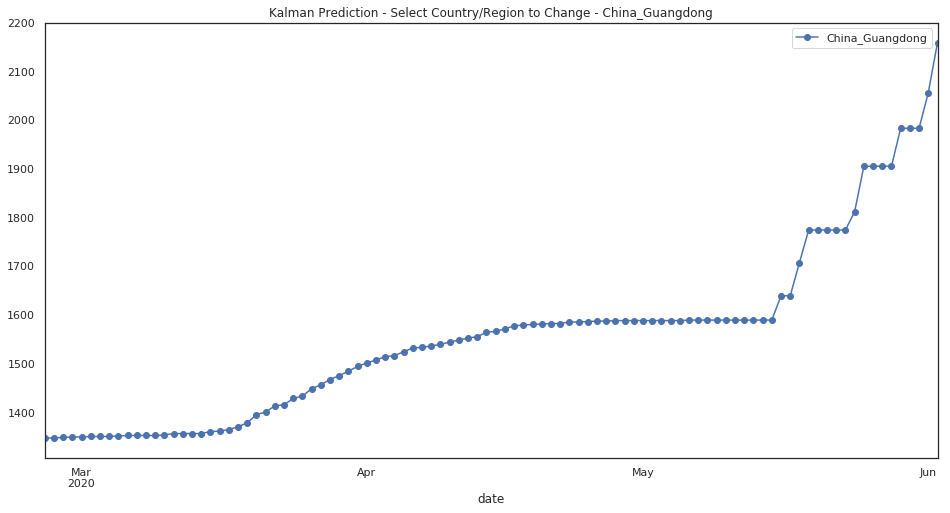

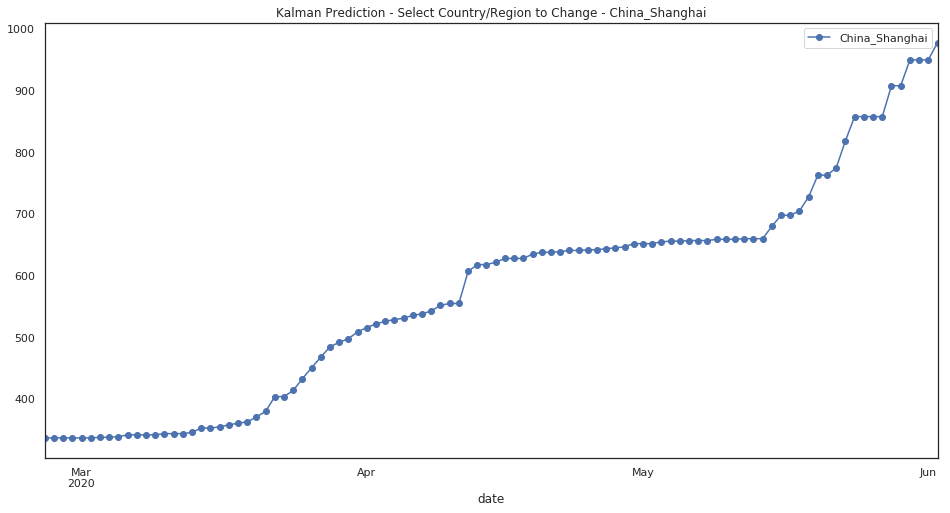

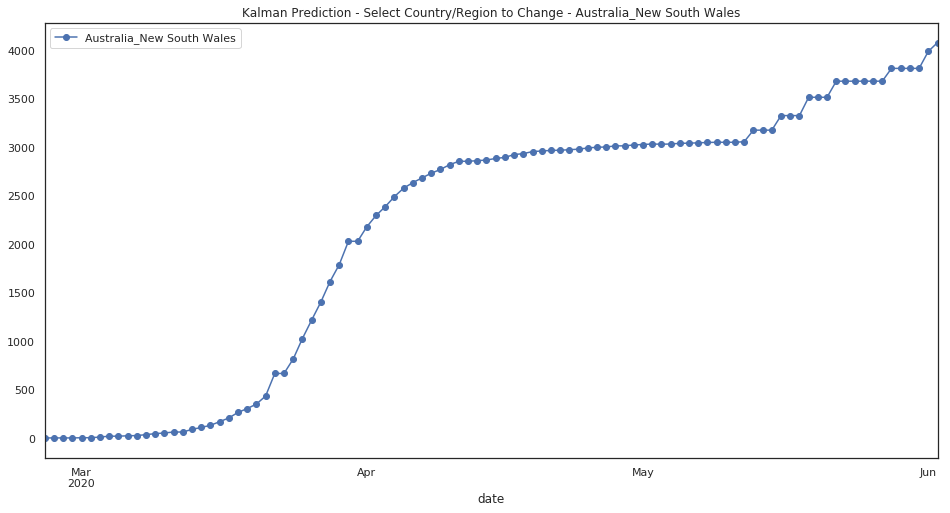

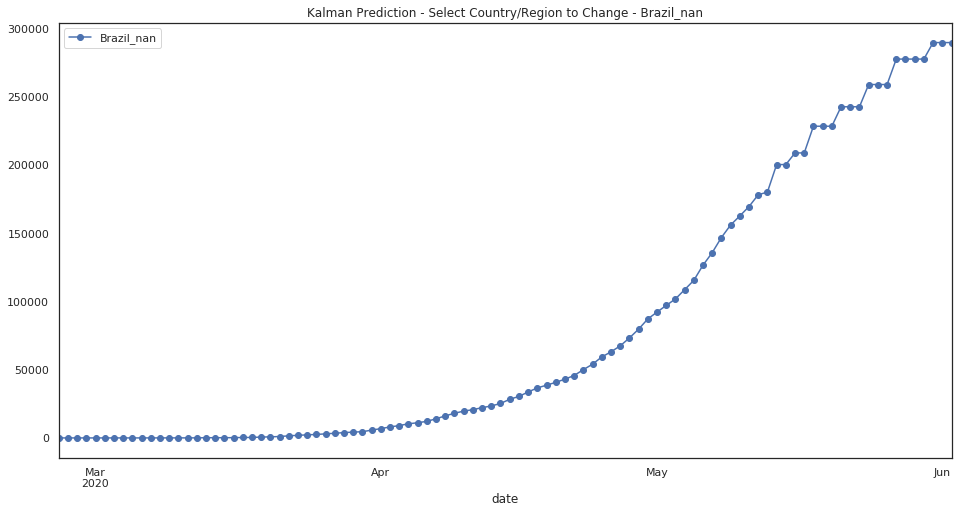

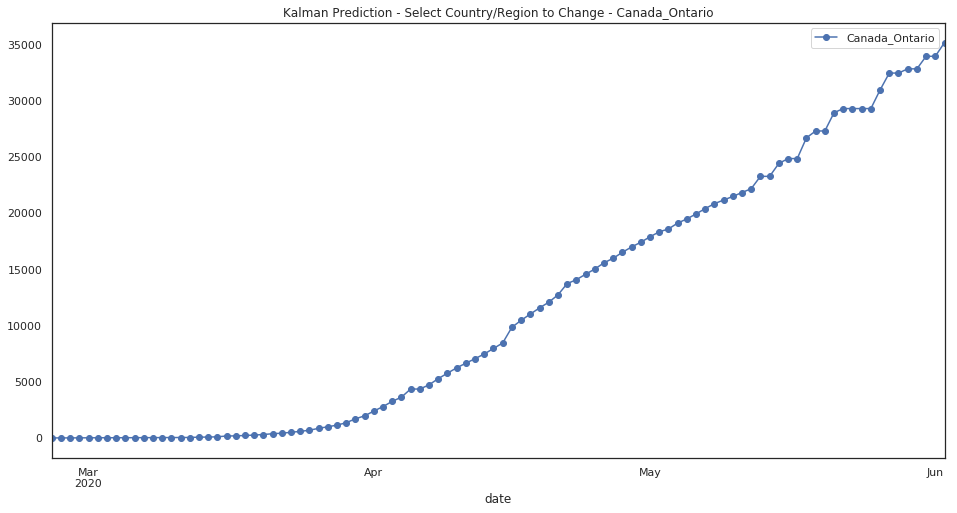

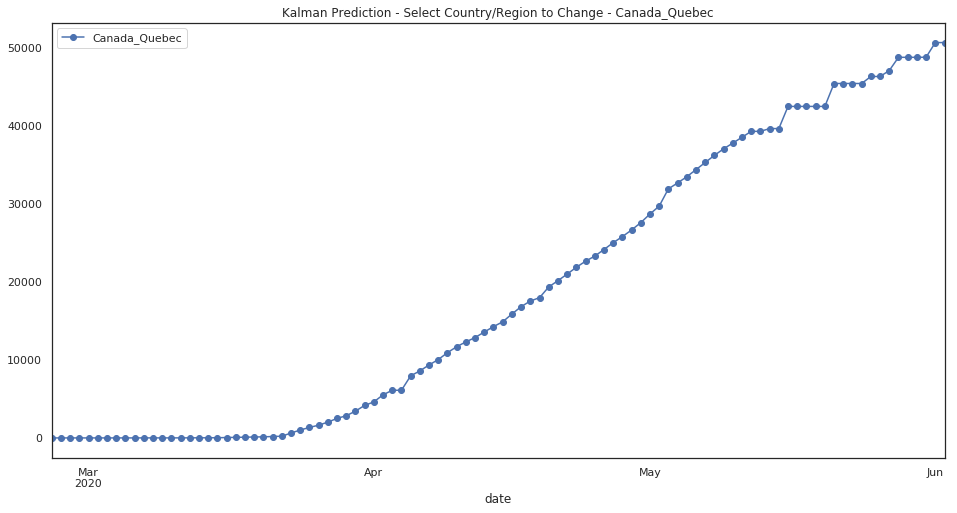

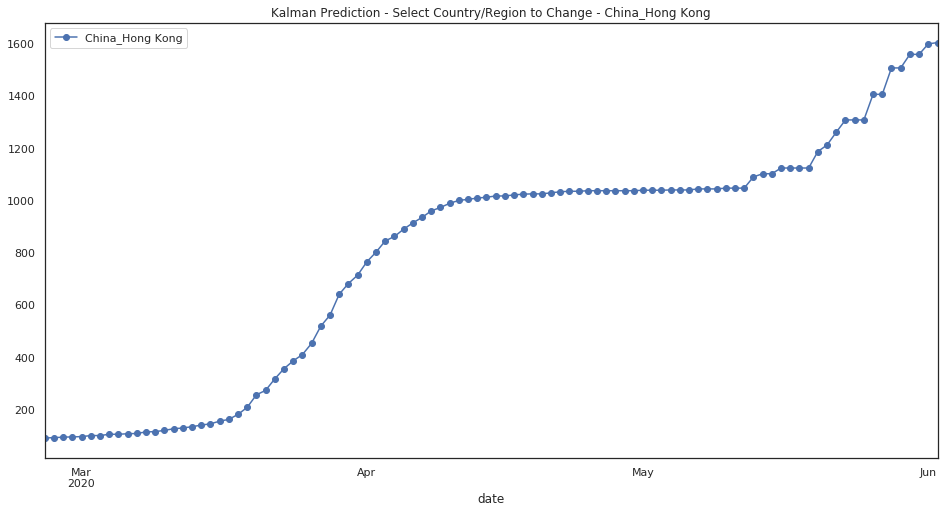

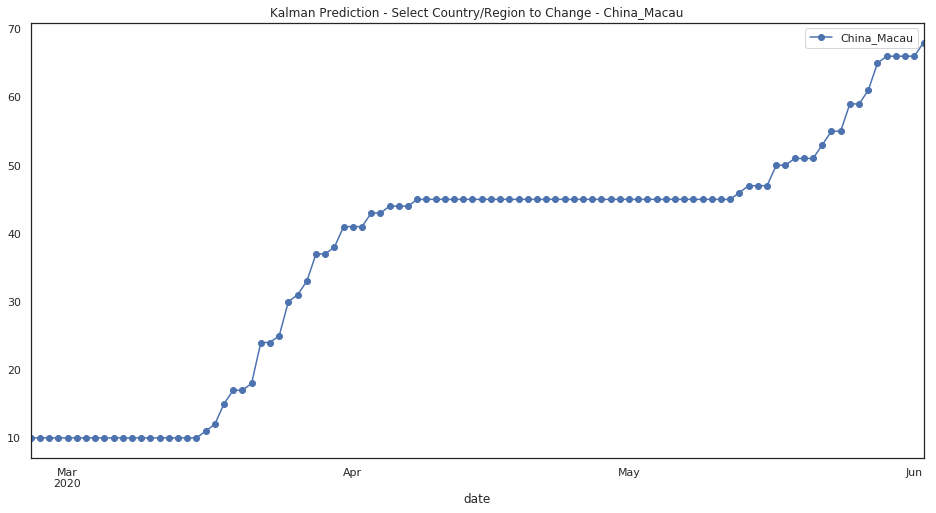

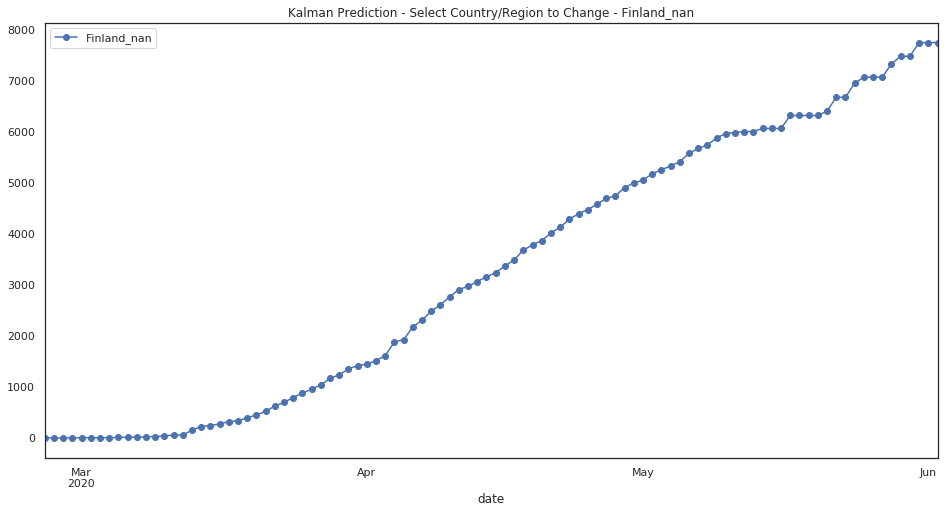

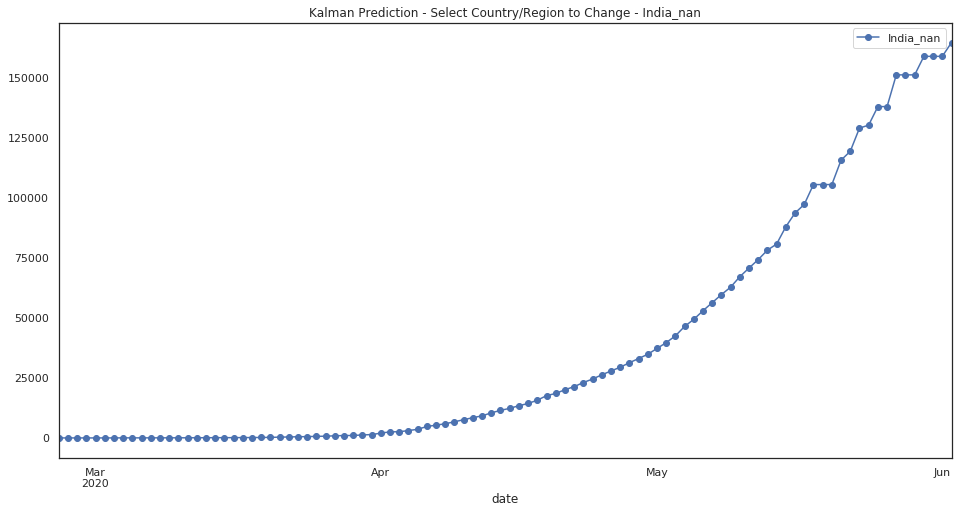

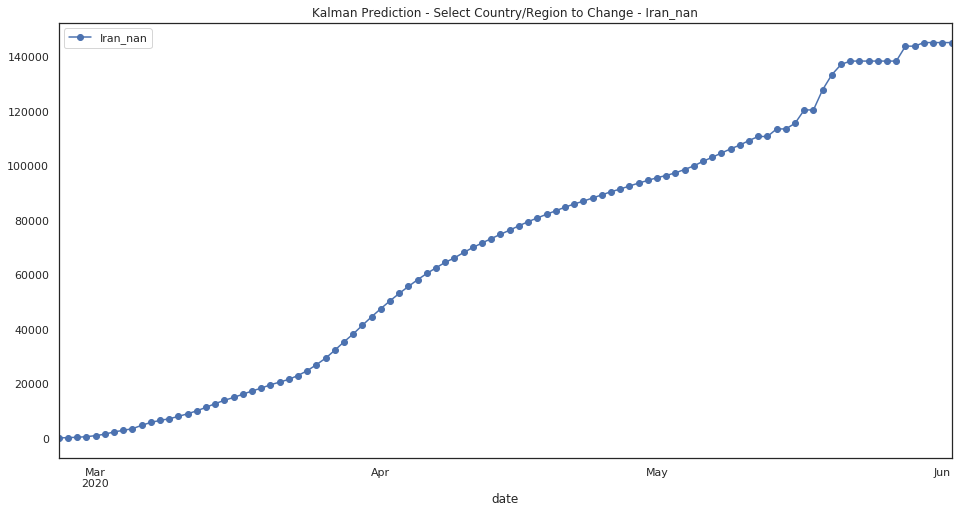

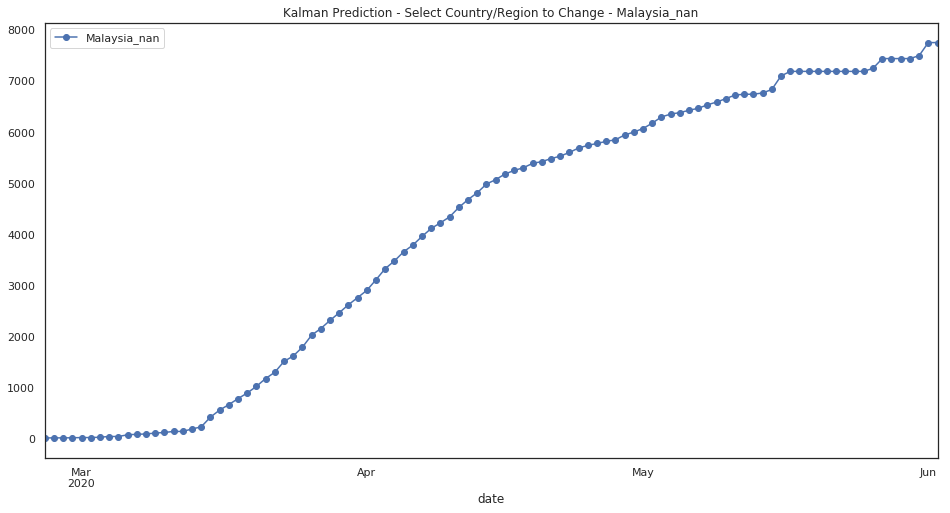

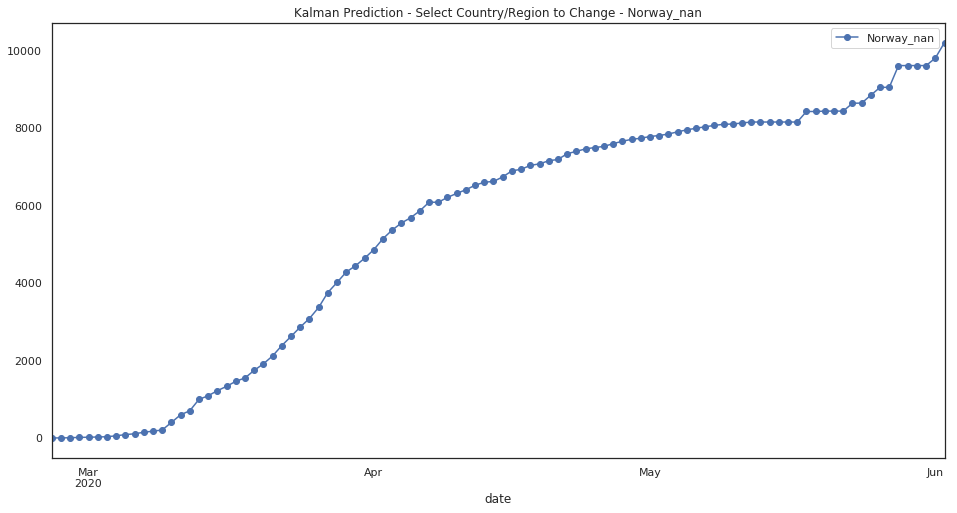

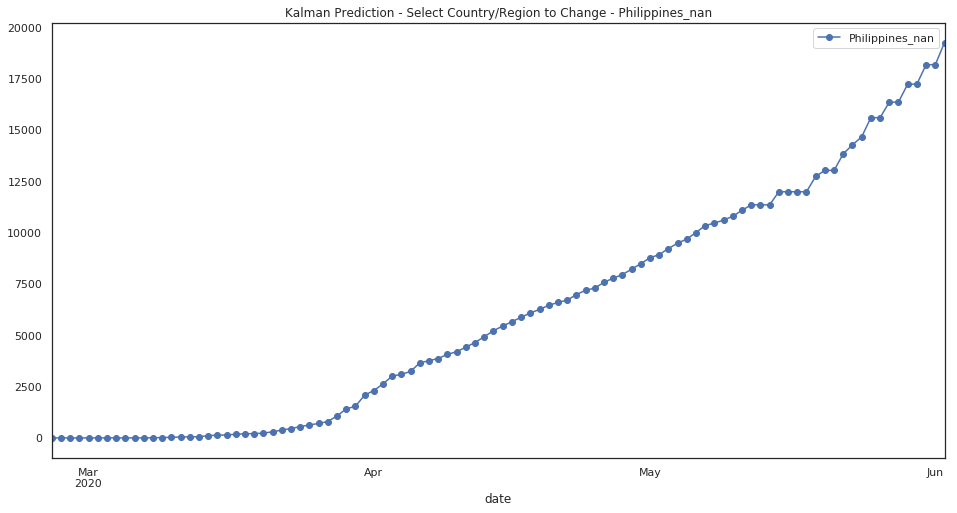

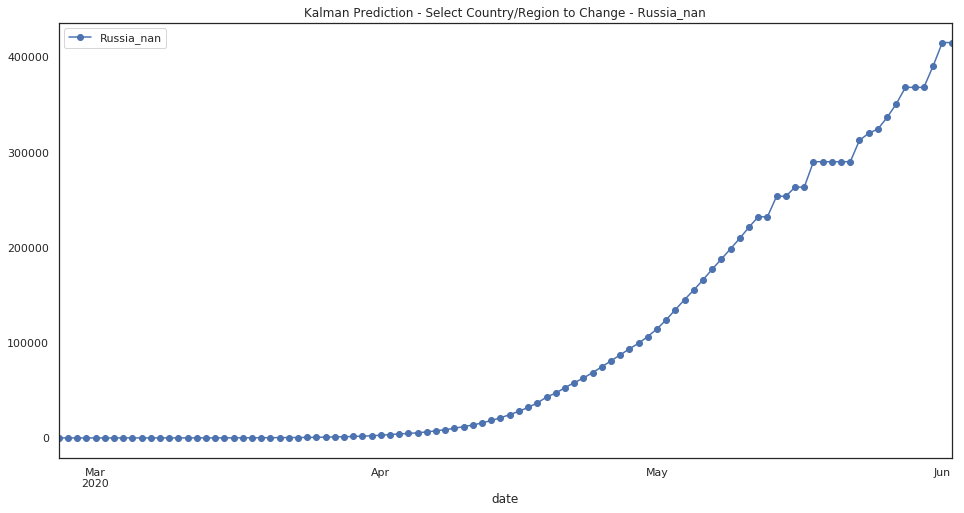

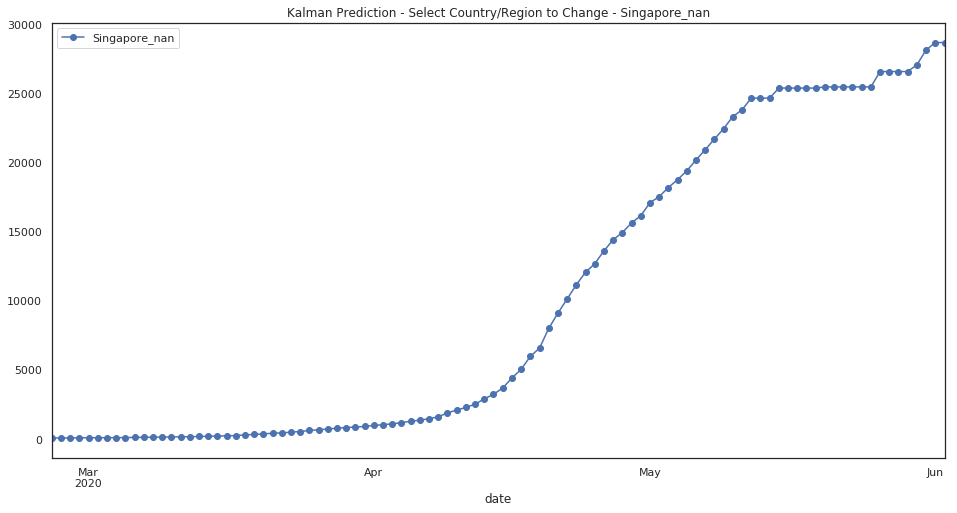

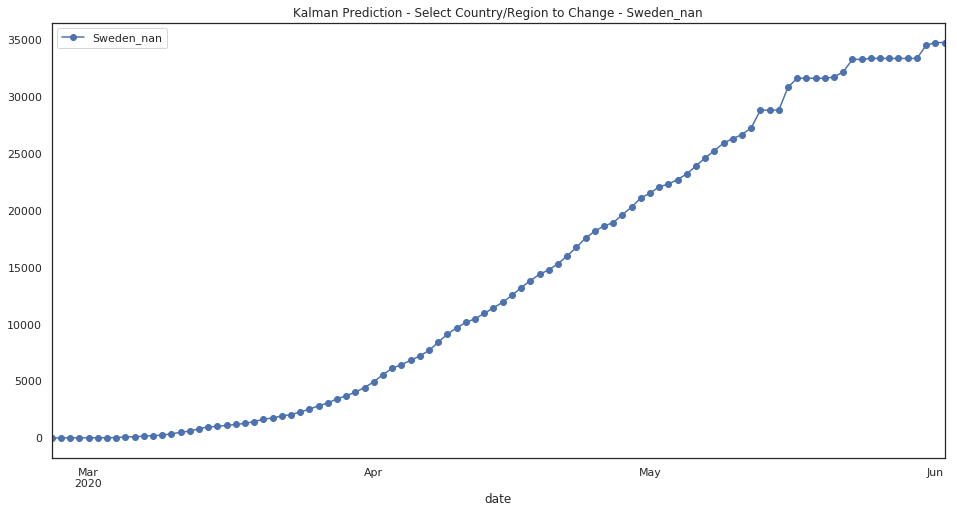

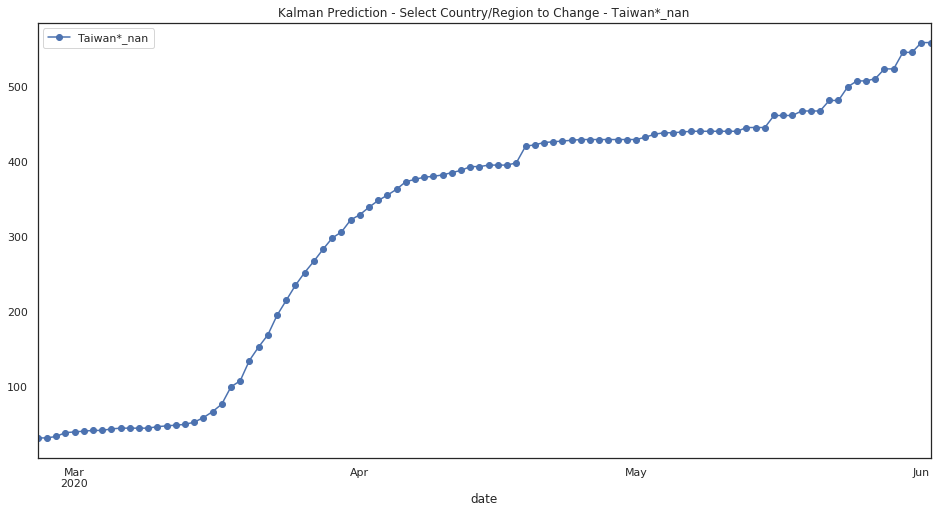

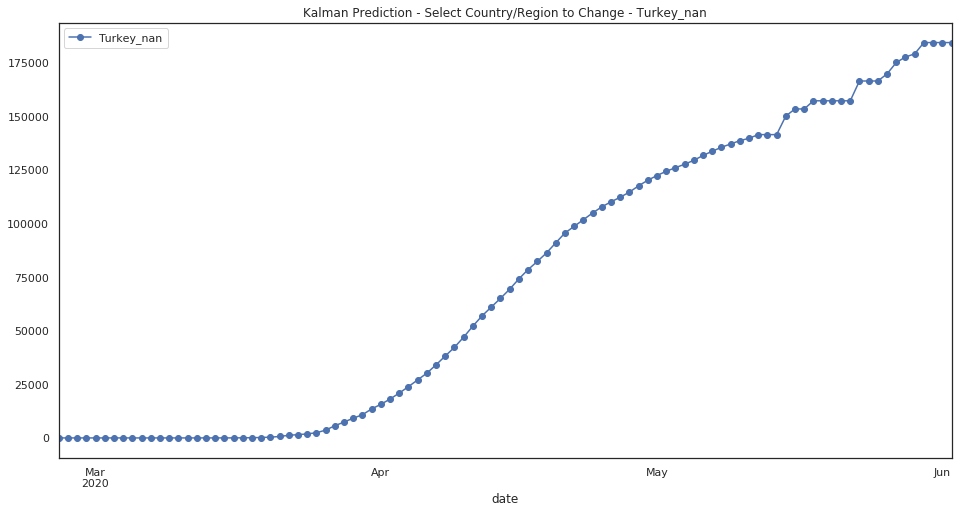

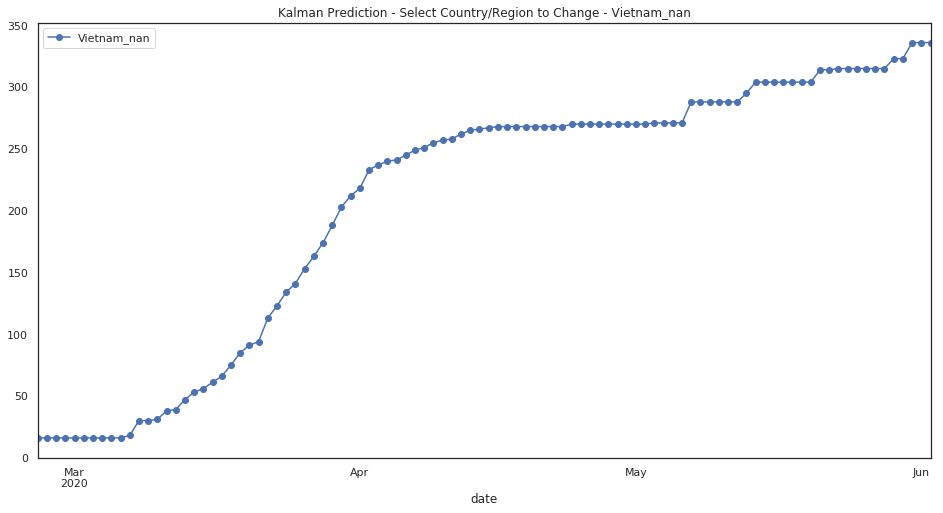

In [64]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [65]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0[max_p0.columns[0]]=max_p0[max_p0.columns[0]][:-len(max_p0['pred_confirmed'])]
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2020-06-02 00:00:00
dtype: object


0  pred_confirmed
United States_nan                             NaN       2300662.0
Russia_nan                                    NaN        415168.0
United Kingdom_nan                            NaN        314499.0
Brazil_nan                                    NaN        289767.0
Spain_nan                                     NaN        281823.0
Italy_nan                                     NaN        244839.0
Germany_nan                                   NaN        243123.0
France_nan                                    NaN        209153.0
Turkey_nan                                    NaN        184411.0
India_nan                                     NaN        164683.0
Iran_nan                                      NaN        145228.0
Peru_nan                                      NaN        105870.0
China_Hubei                                   NaN         86975.0
Belgium_nan                                   NaN         60137.0
Saudi Arabia_nan                              NaN         59972.0
Pakistan_nan                                  NaN         51065.0
Mexico_nan                                    NaN         50863.0
Canada_Quebec                                 NaN         50594.0
Netherlands_nan                               NaN         48836.0
Chile_nan                                     NaN         43690.0
Belarus_nan                                   NaN         39218.0
Switzerland_nan                               NaN         37404.0
Ecuador_nan                                   NaN         35271.0
Canada_Ontario                                NaN         35143.0
Sweden_nan                                    NaN         34760.0
Ireland_nan                                   NaN         33693.0
Portugal_nan                                  NaN         33646.0
Qatar_nan                                     NaN         32270.0
Ukraine_nan                                   NaN         29393.0
Singapore_nan                                 NaN         28688.0
...                                           ...             ...
United Kingdom_Falkland Islands (Malvinas)    NaN            22.0
Namibia_nan                                   NaN            22.0
Saint Lucia_nan                               NaN            22.0
China_Qinghai                                 NaN            21.0
Saint Vincent and the Grenadines_nan          NaN            20.0
Dominica_nan                                  NaN            20.0
Fiji_nan                                      NaN            19.0
Netherlands_Curacao                           NaN            18.0
Burundi_nan                                   NaN            18.0
United Kingdom_Turks and Caicos Islands       NaN            16.0
Canada_Grand Princess                         NaN            16.0
Mauritania_nan                                NaN            13.0
Holy See_nan                                  NaN            13.0
Seychelles_nan                                NaN            12.0
Denmark_Greenland                             NaN            11.0
United Kingdom_Montserrat                     NaN            11.0
Canada_Yukon                                  NaN            11.0
Suriname_nan                                  NaN            10.0
MS Zaandam_nan                                NaN             9.0
Papua New Guinea_nan                          NaN             8.0
United Kingdom_British Virgin Islands         NaN             7.0
France_Saint Barthelemy                       NaN             6.0
Netherlands_Bonaire, Sint Eustatius and Saba  NaN             6.0
Western Sahara_nan                            NaN             6.0
Canada_Northwest Territories                  NaN             5.0
United Kingdom_Anguilla                       NaN             3.0
Canada_Diamond Princess                       NaN             1.0
France_Saint Pierre and Miquelon              NaN             1.0
China_Tibet                                   NaN             1.0
Canada_Recovered      

In [66]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [67]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [68]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-2,2]*100 -1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-4,2]*100 -1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-8,2]*100 -1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
#test_iter['infected_rate'] =((test_iter['last_day']+1)*10000)/((test_iter['population']+1)*100)*100
test_iter['infected_rate']=(((test_iter['last_day'] +1)*100)/((test_iter['population'] +1)*100000) *10)
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [69]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [70]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        
### Joao - Save long term predictions
pred.to_csv('data/pred_'+str(num_days_R_prediction)+'_days.csv', index = False, header=True)
###
pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [71]:
pred[:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-02-26             48.0         14.0         93.0         14.0   
2020-02-27             98.0         14.0        117.0         14.0   
2020-02-28             31.0         14.0         66.0         14.0   
2020-02-29             35.0         14.0         70.0         14.0   
2020-03-01             43.0         14.0         67.0         14.0   
2020-03-02             47.0         14.0         68.0         15.0   
2020-03-03             46.0         14.0         32.0         16.0   
2020-03-04             33.0         14.0         74.0          1.0   
2020-03-05             34.0         14.0        113.0          1.0   
2020-03-06             37.0         14.0        120.0          1.0   
2020-03-07             47.0         14.0        101.0          1.0   
2020-03-08             53.0         14.0        102.0          1.0   
2020-03-09              4.0         15.0        112.0          1.0   
2020-03-10             56.0         24.0         87.0          1.0   
2020-03-11             71.0         10.0         87.0          1.0   
2020-03-12             57.0         13.0         91.0          1.0   
2020-03-13             69.0         50.0         92.0          1.0   
2020-03-14             71.0         39.0        103.0          1.0   
2020-03-15             74.0         44.0        118.0          1.0   
2020-03-16             76.0         47.0        129.0          1.0   
2020-03-17             85.0         86.0        135.0         17.0   
2020-03-18             83.0         62.0        146.0         39.0   
2020-03-19             80.0         66.0        163.0        214.0   
2020-03-20             81.0         69.0        169.0        220.0   
2020-03-21             82.0         76.0        204.0        192.0   
2020-03-22             95.0         88.0        293.0        231.0   
2020-03-23            101.0        107.0        342.0        291.0   
2020-03-24            129.0        127.0        356.0        253.0   
2020-03-25            161.0        153.0        391.0        208.0   
2020-03-26            161.0        182.0        448.0        236.0   
...                     ...          ...          ...          ...   
2020-05-05           3316.0        813.0       4956.0        773.0   
2020-05-06           3623.0        834.0       5133.0        772.0   
2020-05-07           3647.0        841.0       5291.0        772.0   
2020-05-08           3862.0        848.0       5497.0        773.0   
2020-05-09           4125.0        852.0       5682.0        774.0   
2020-05-10           4502.0        860.0       5851.0        777.0   
2020-05-11           4901.0        870.0       5998.0        776.0   
2020-05-12           5107.0        872.0       6174.0        778.0   
2020-05-13           5253.0        876.0       6291.0        781.0   
2020-05-14           5118.0        876.0       6242.0        784.0   
2020-05-15           5162.0        906.0       6216.0        790.0   
2020-05-16           5377.0        952.0       6686.0        808.0   
2020-05-17           5327.0        933.0       7200.0        836.0   
2020-05-18           5400.0        955.0       7032.0        833.0   
2020-05-19           5412.0        944.0       7376.0        857.0   
2020-05-20           5446.0        986.0       7470.0        835.0   
2020-05-21           5795.0       1045.0       7278.0        835.0   
2020-05-22           6123.0       1008.0       7654.0        832.0   
2020-05-23           6001.0       1061.0       8284.0        863.0   
2020-05-24           6183.0       1125.0       8288.0        904.0   
2020-05-25           6187.0       1082.0       8047.0        892.0   
2020-05-26           6420.0       1082.0       8015.0        916.0   
2020-05-27           6208.0       1082.0       8418.0        918.0   
2020-05-28           6573.0       1082.0       8899.0        947.0   
2020-05-29

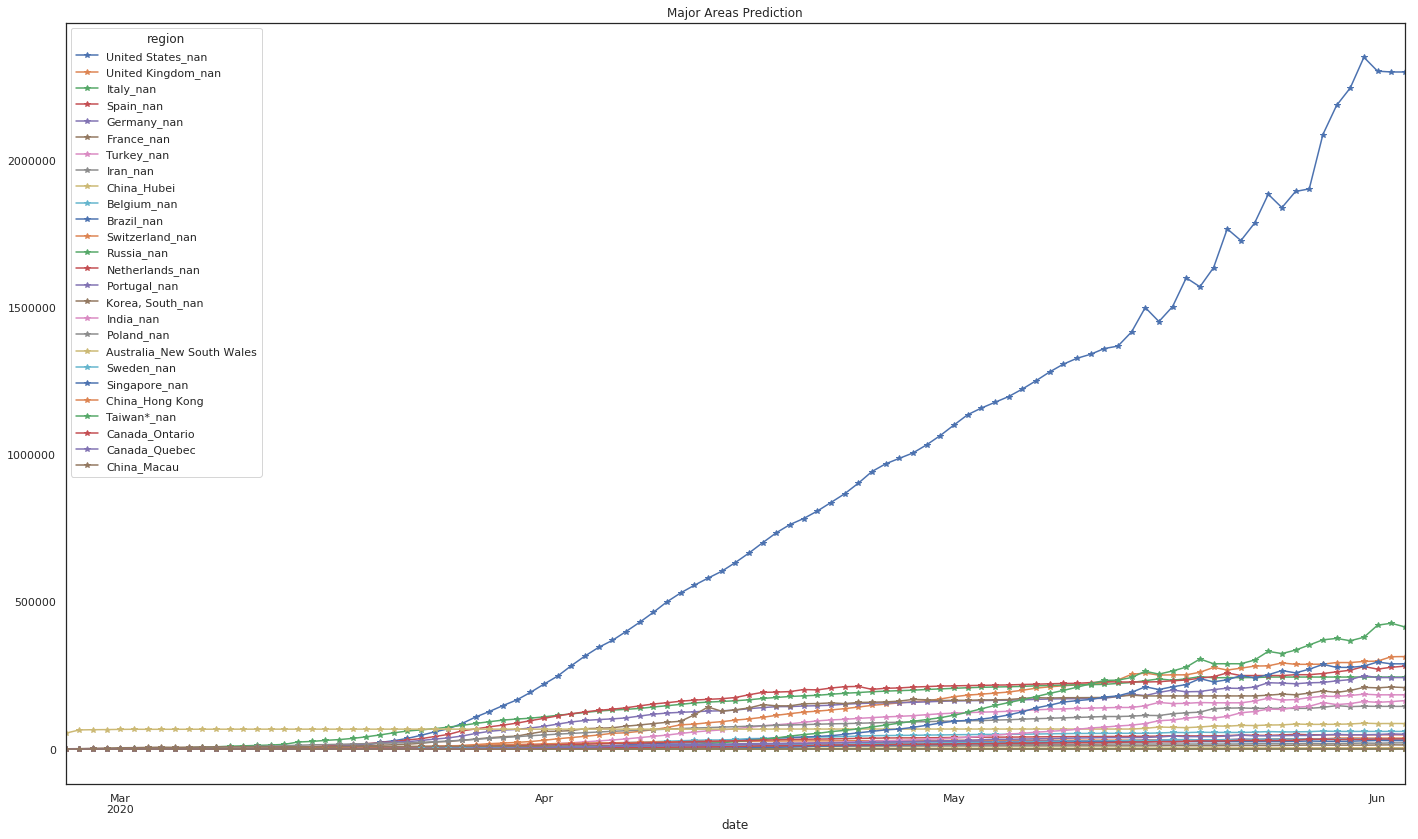

In [72]:
region=[
 ### JOAO - LIST of Countries - Start here
 ###    'Andorra_nan', 'Morocco_nan',
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',
        'Germany_nan',
        'France_nan',
        'Turkey_nan',
        'Iran_nan',
        'China_Hubei',
        'Belgium_nan',
        'Brazil_nan',
        'Switzerland_nan',
        'Russia_nan',
        'Netherlands_nan',
        'Portugal_nan',
        'Korea, South_nan',
        'India_nan',
        'Poland_nan',
        'Australia_New South Wales',
        'Sweden_nan',
        'Singapore_nan',
        'China_Hong Kong',
        'Taiwan*_nan',
        'Canada_Ontario',
        'Canada_Quebec',
        'China_Macau'
  ### JOAO - LIST of Countries - Finish here     
       ]

p=pred[region]
p[:].plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

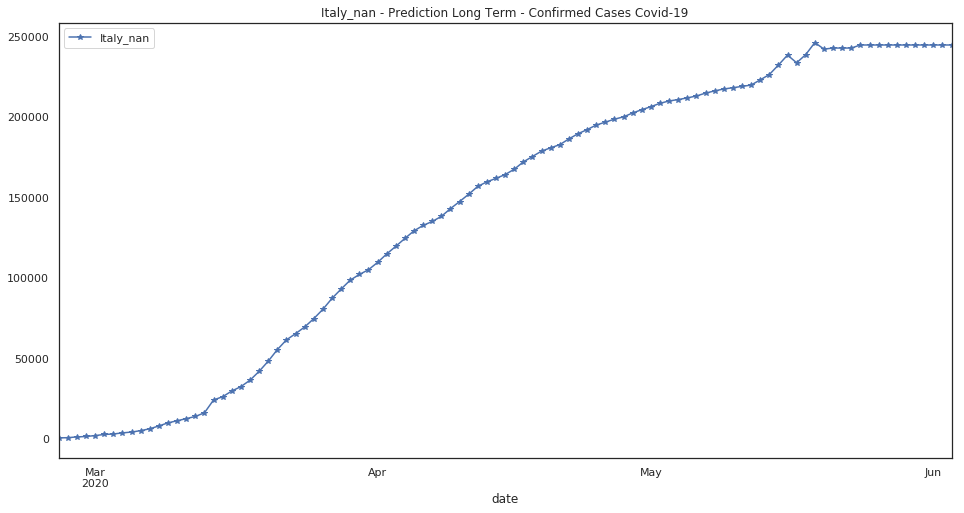

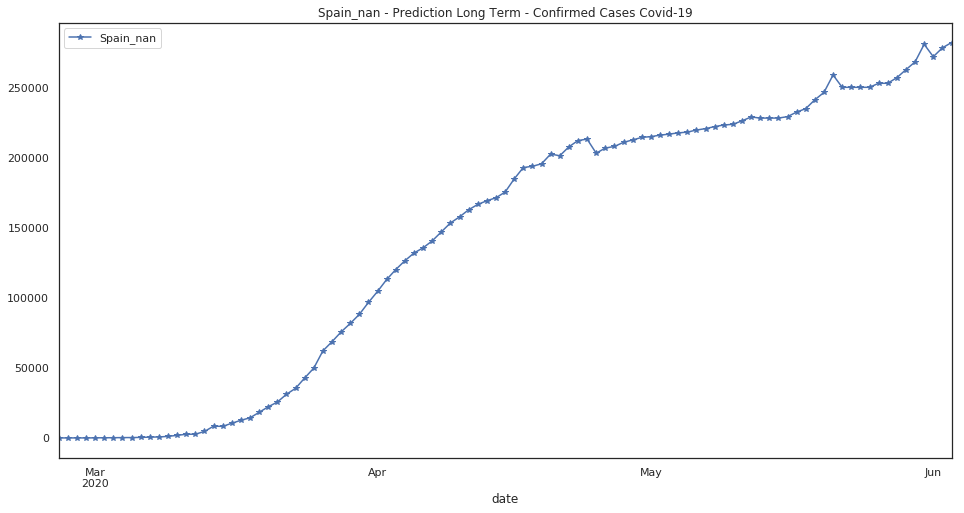

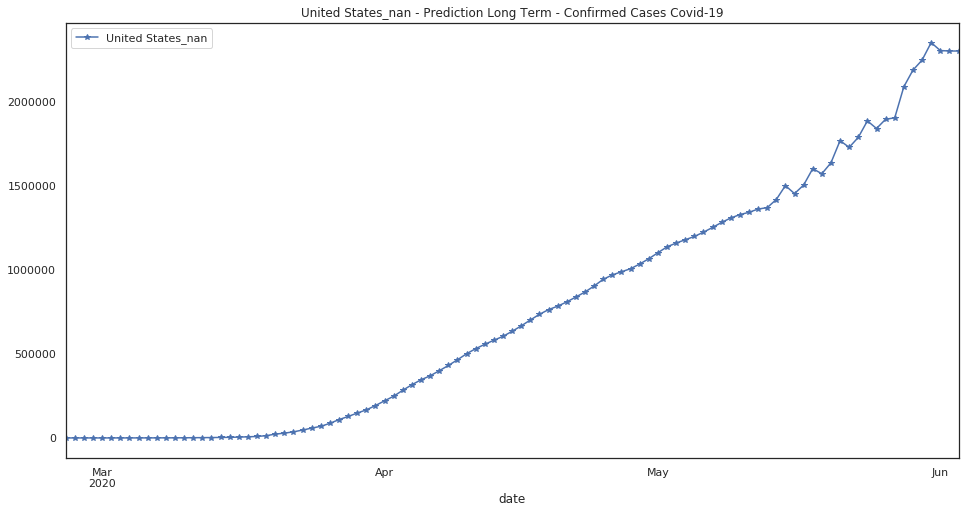

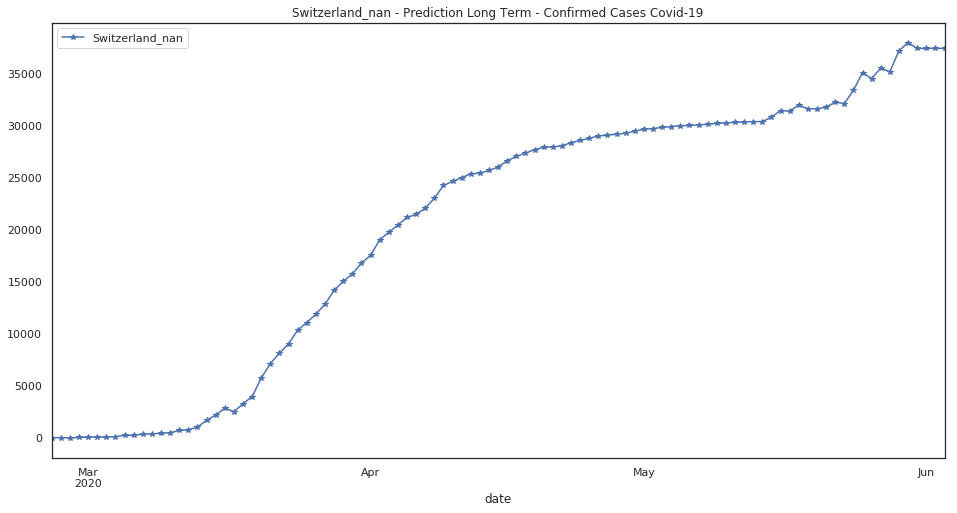

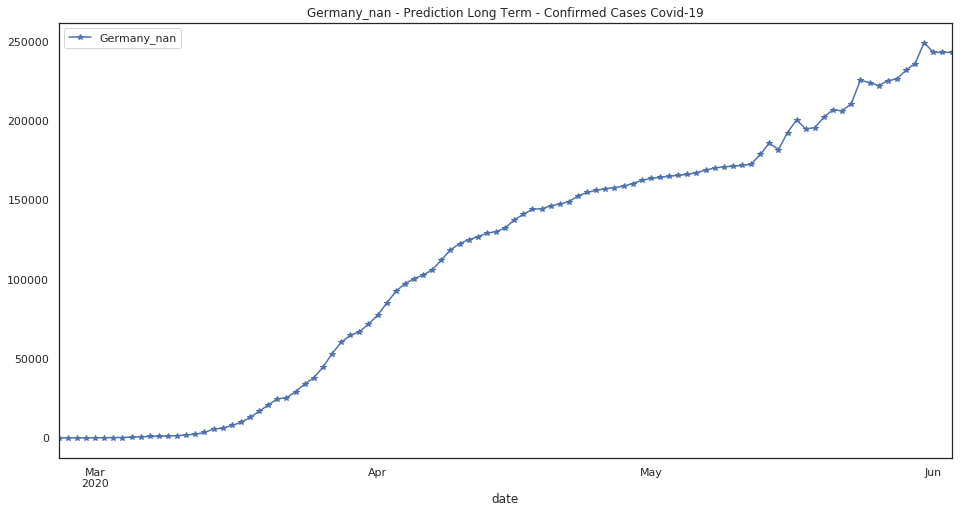

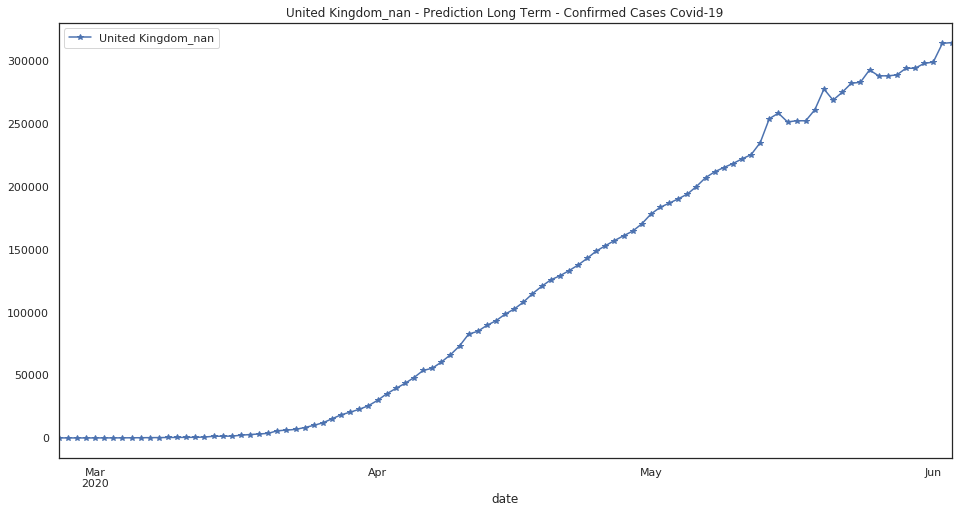

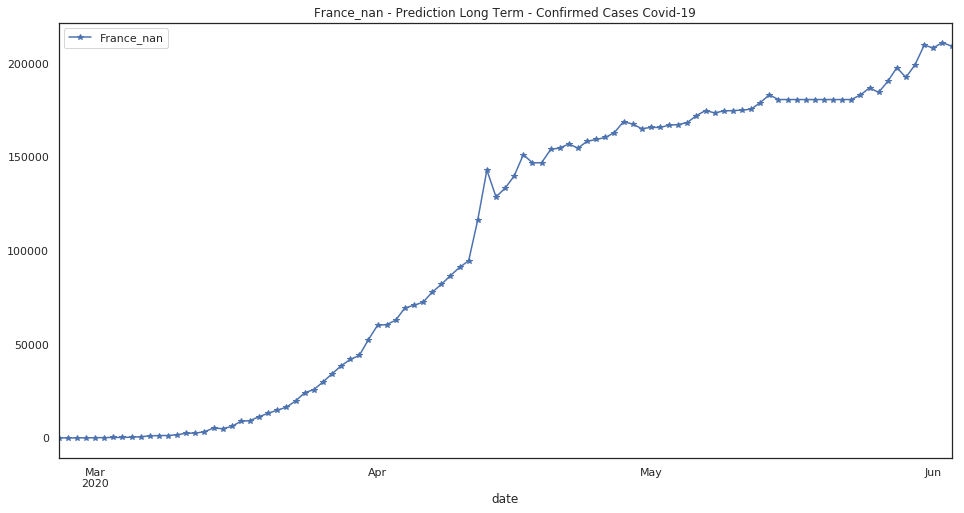

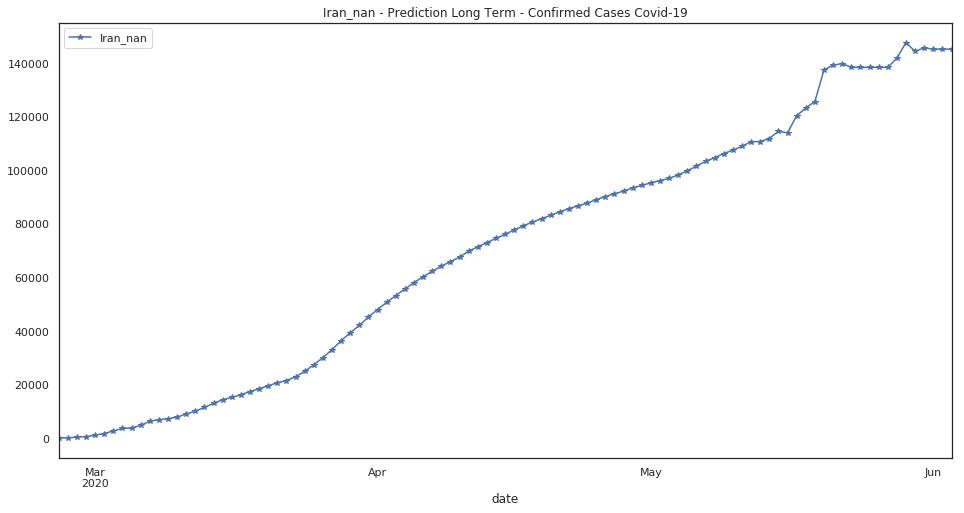

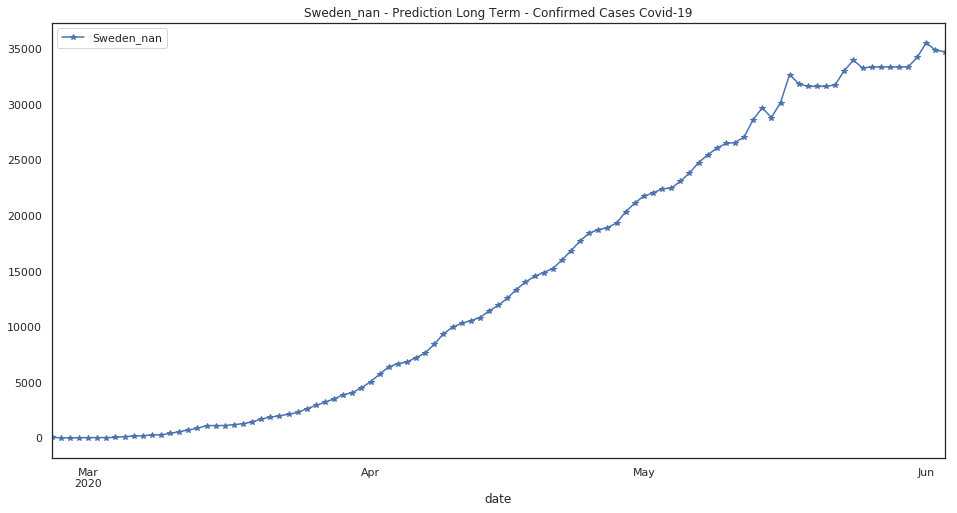

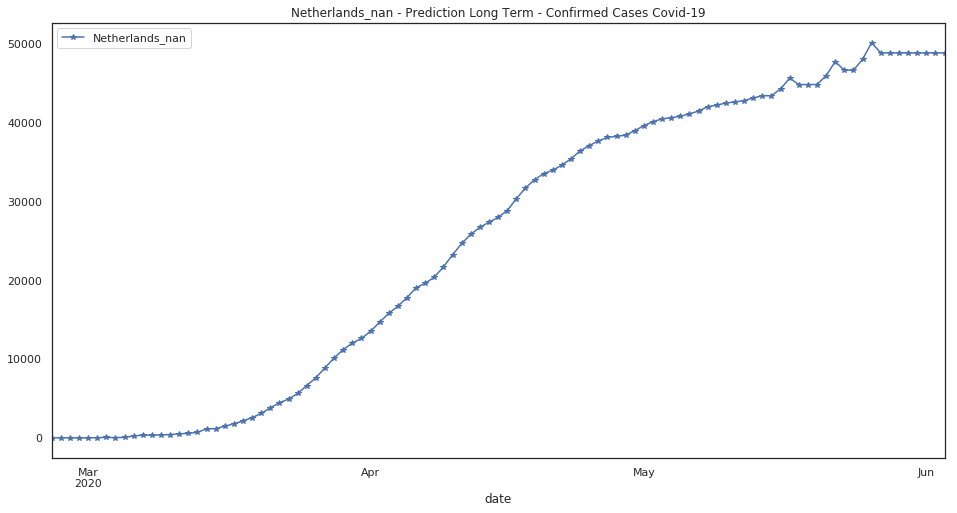

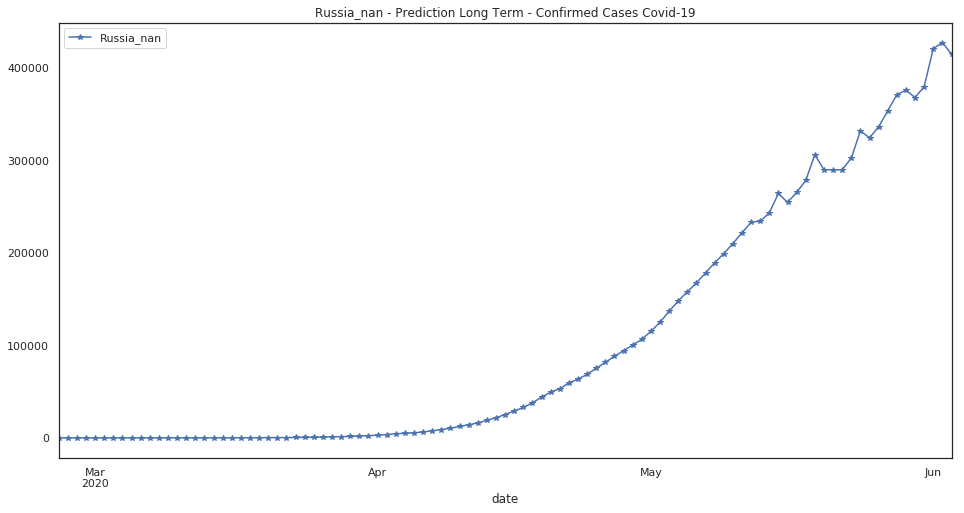

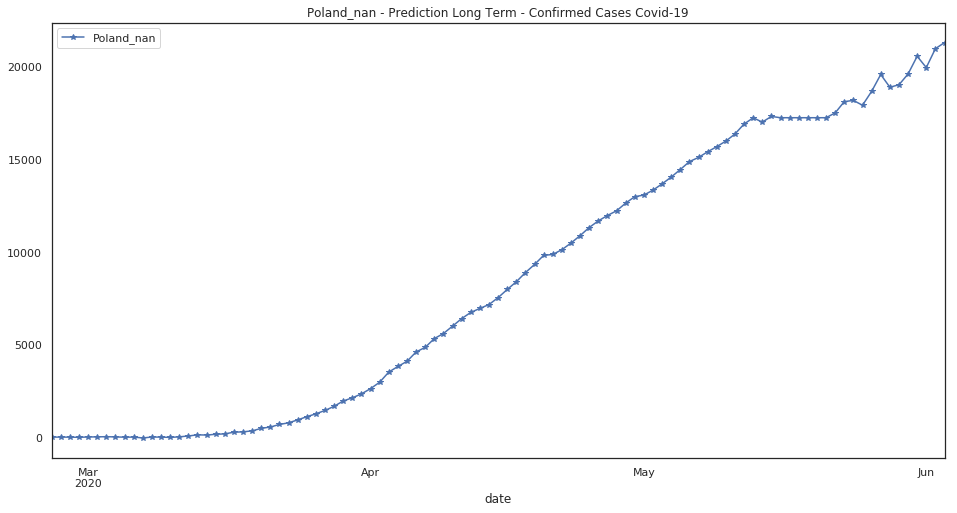

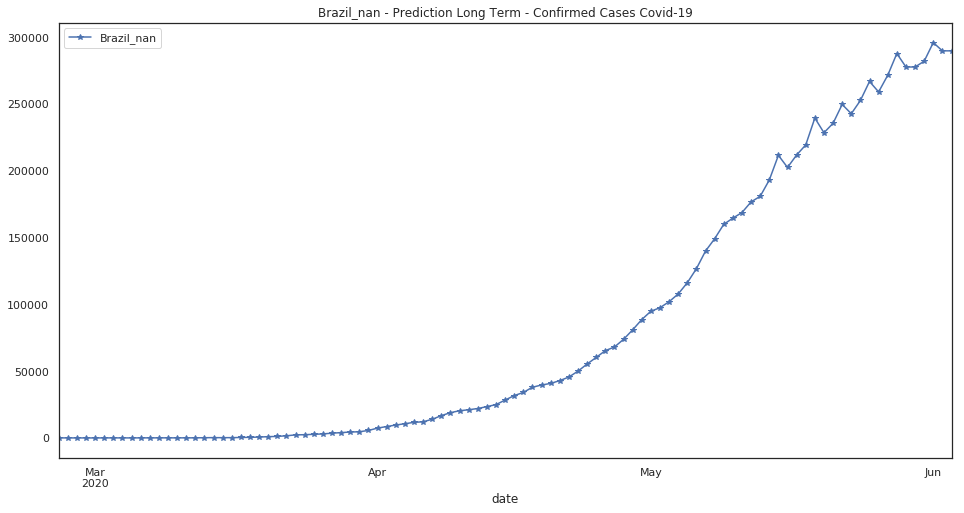

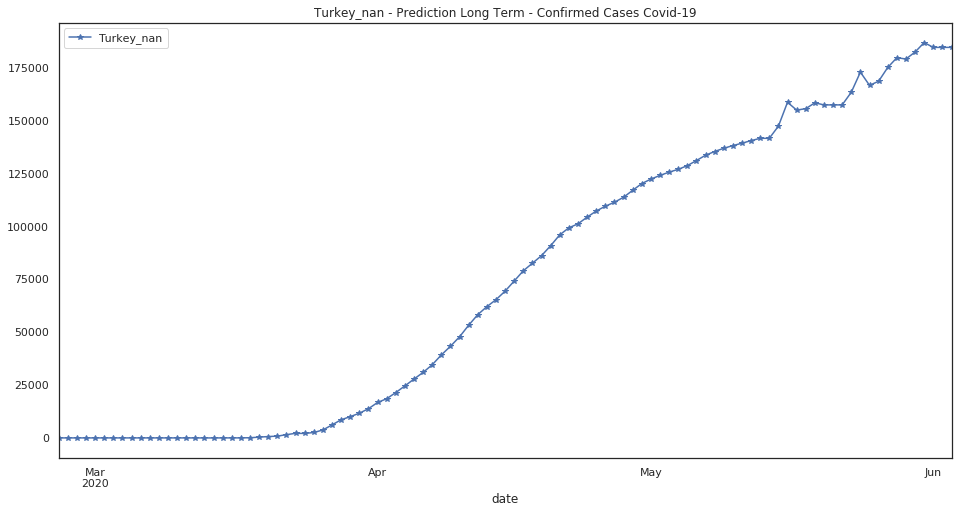

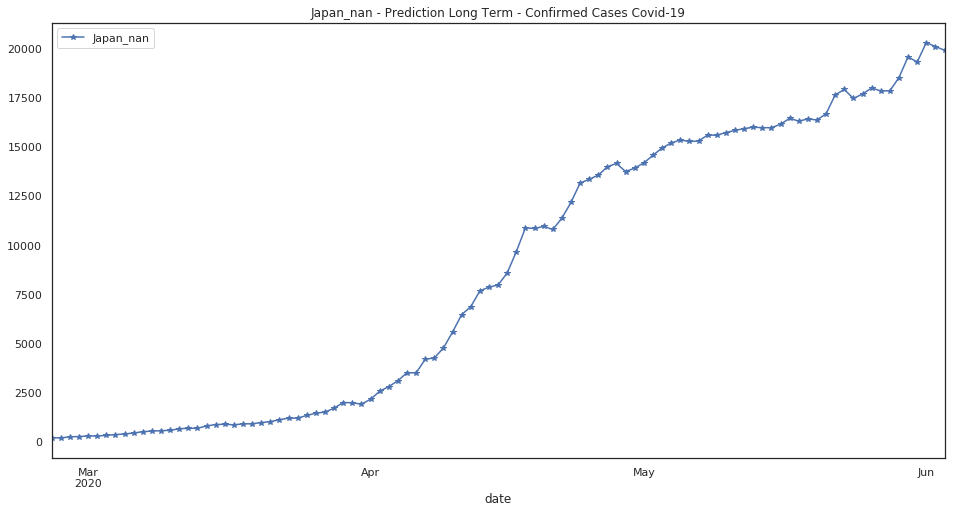

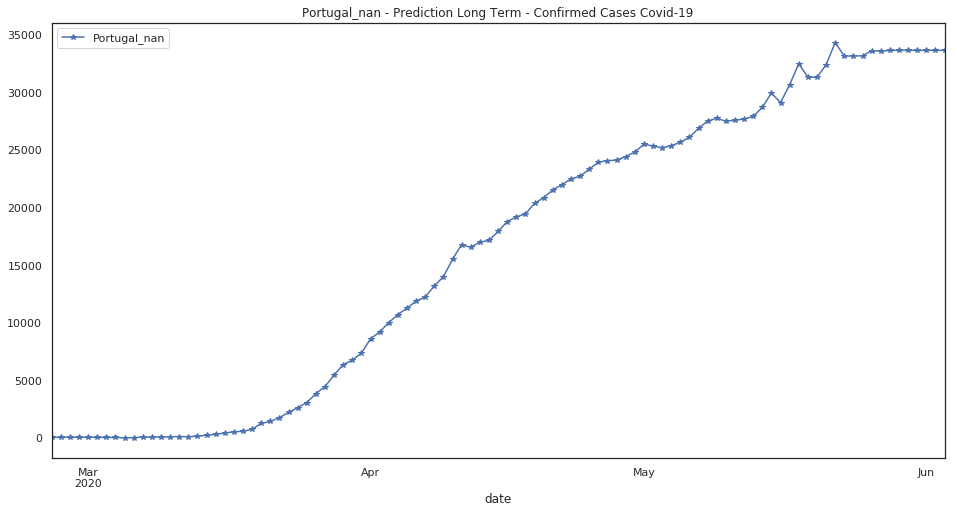

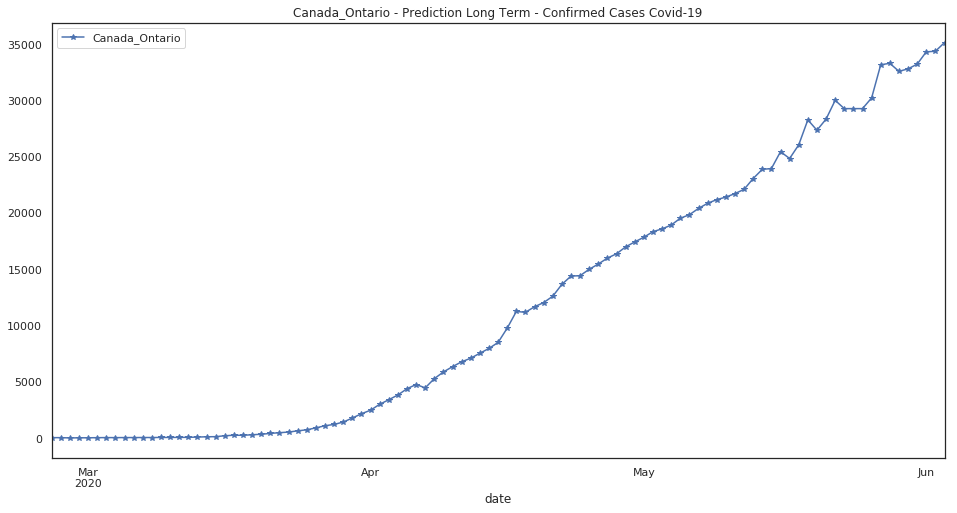

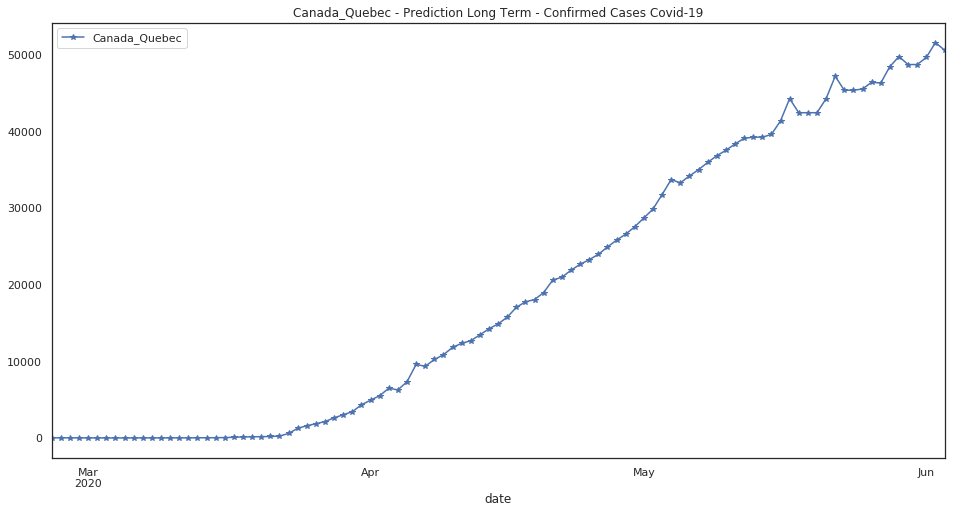

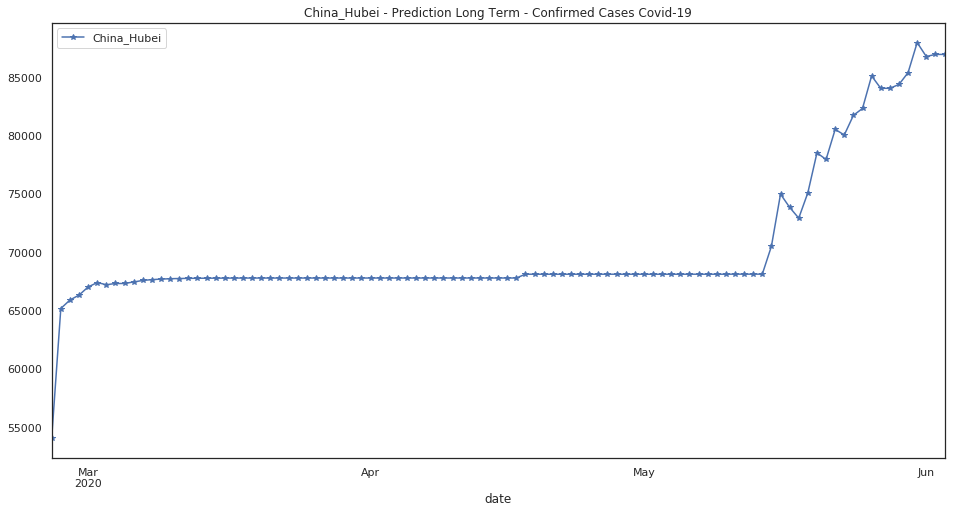

In [73]:
#
rgsx=['Italy_nan','Spain_nan','United States_nan','Switzerland_nan',
      'Germany_nan','United Kingdom_nan','France_nan','Iran_nan',
      'Sweden_nan','Netherlands_nan','Russia_nan','Poland_nan',
      'Brazil_nan','Turkey_nan','Japan_nan',
      'Portugal_nan','Canada_Ontario','Canada_Quebec','China_Hubei']
for i in range (0,len(rgsx)):
        rg_print=rgsx[i]
        pred_prg=pd.DataFrame()
        pred_prg=pred[rg_print]
        pred_prg[:].plot(marker='*',figsize=(16,8),title =rg_print+' - Prediction Long Term - Confirmed Cases Covid-19')
        plt.legend(loc = 'upper left')
        plt.show()
#

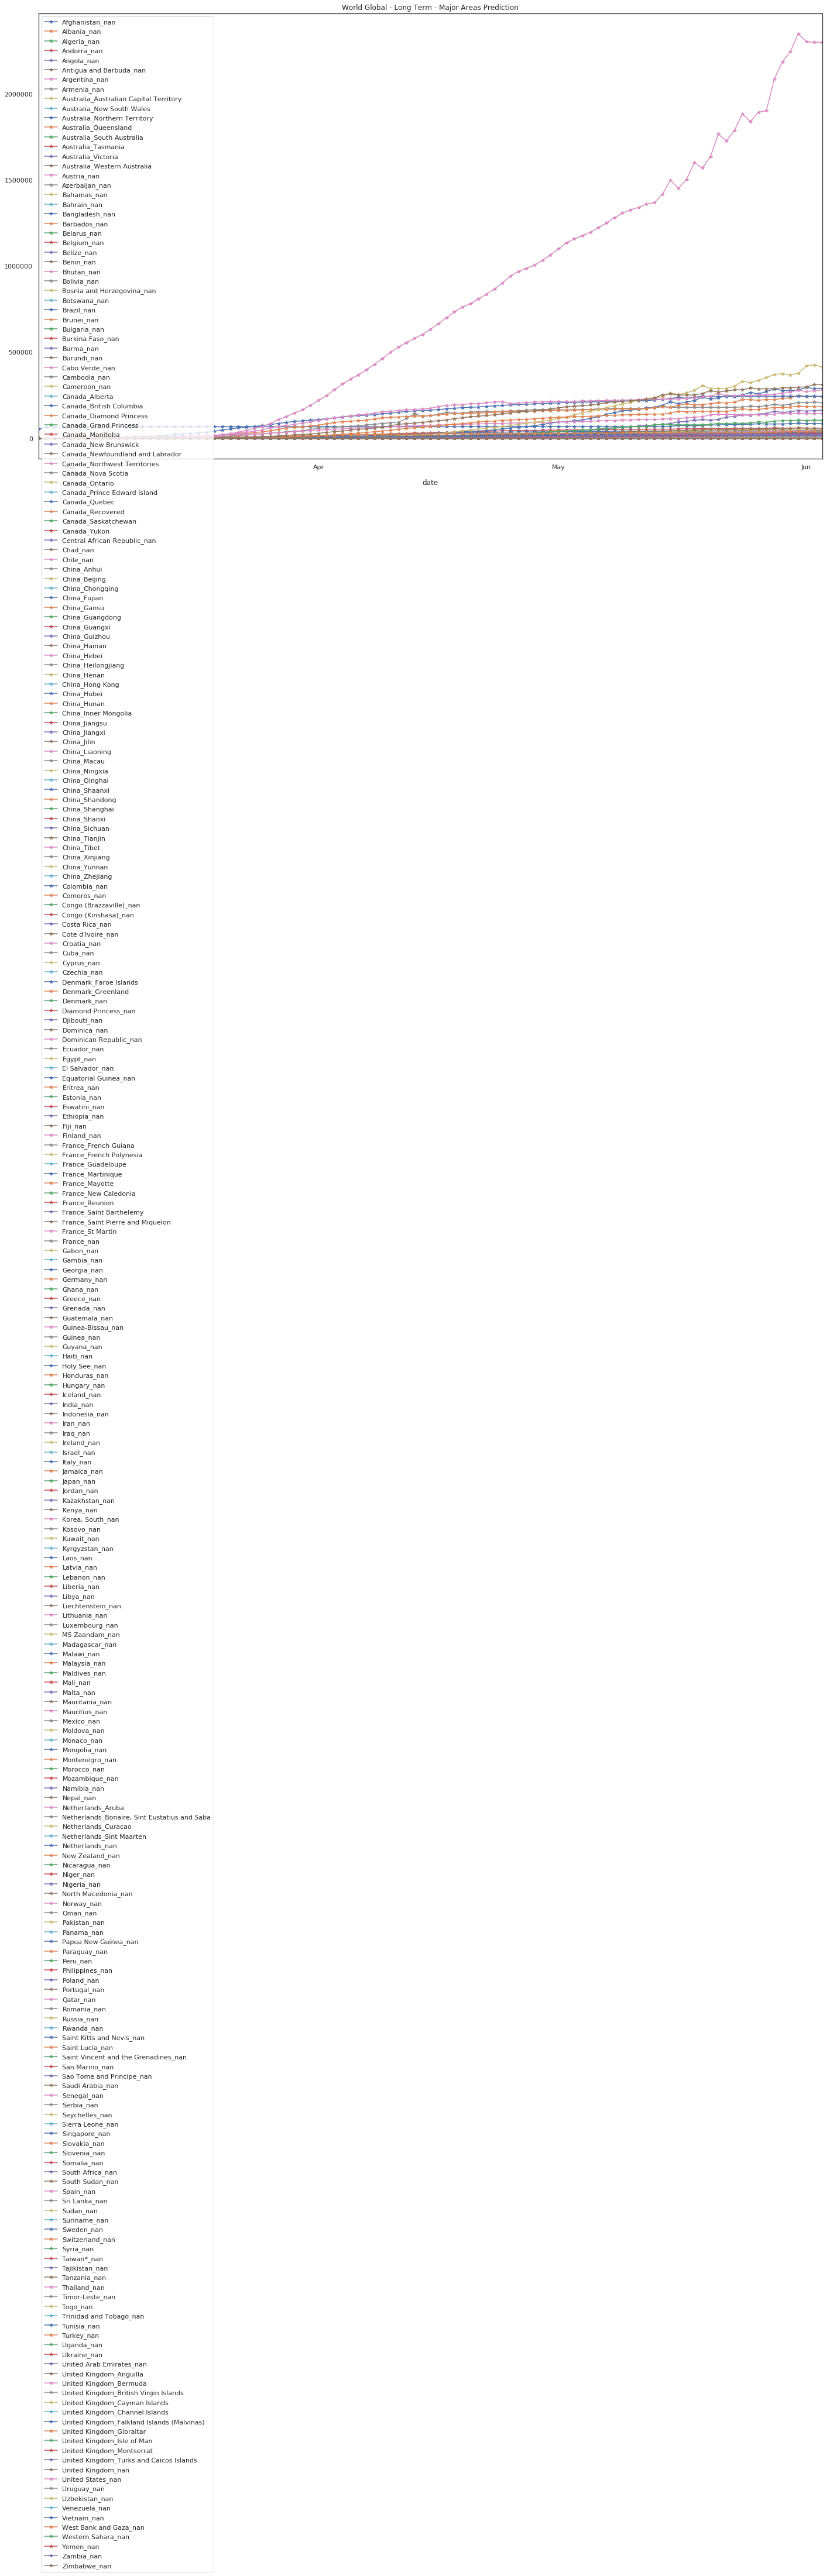

In [74]:
#region=my_train_list
pv2=pred
pv2[:].plot(marker='*',figsize=(24,14),title ='World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()


## Prediction Heatmap

In [75]:
pv1=pv2[:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)

In [76]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-04-11            629.0        423.0       1934.0        619.0   
2020-04-12            676.0        446.0       1991.0        636.0   
2020-04-13            748.0        464.0       2081.0        681.0   
2020-04-14            802.0        482.0       2150.0        672.0   
2020-04-15            865.0        488.0       2252.0        692.0   
2020-04-16            936.0        520.0       2362.0        694.0   
2020-04-17            988.0        544.0       2523.0        703.0   
2020-04-18           1028.0        552.0       2680.0        733.0   
2020-04-19           1050.0        556.0       2748.0        728.0   
2020-04-20           1114.0        579.0       2819.0        739.0   
2020-04-21           1147.0        609.0       2897.0        734.0   
2020-04-22           1260.0        637.0       2995.0        736.0   
2020-04-23           1376.0        666.0       3097.0        743.0   
2020-04-24           1472.0        686.0       3215.0        744.0   
2020-04-25           1553.0        705.0       3369.0        761.0   
2020-04-26           1653.0        736.0       3505.0        762.0   
2020-04-27           1768.0        728.0       3636.0        762.0   
2020-04-28           1979.0        739.0       3772.0        766.0   
2020-04-29           2049.0        757.0       3953.0        761.0   
2020-04-30           2252.0        768.0       4169.0        764.0   
2020-05-01           2516.0        773.0       4281.0        765.0   
2020-05-02           2593.0        782.0       4414.0        766.0   
2020-05-03           2787.0        789.0       4572.0        770.0   
2020-05-04           3046.0        796.0       4774.0        770.0   
2020-05-05           3316.0        813.0       4956.0        773.0   
2020-05-06           3623.0        834.0       5133.0        772.0   
2020-05-07           3647.0        841.0       5291.0        772.0   
2020-05-08           3862.0        848.0       5497.0        773.0   
2020-05-09           4125.0        852.0       5682.0        774.0   
2020-05-10           4502.0        860.0       5851.0        777.0   
2020-05-11           4901.0        870.0       5998.0        776.0   
2020-05-12           5107.0        872.0       6174.0        778.0   
2020-05-13           5253.0        876.0       6291.0        781.0   
2020-05-14           5118.0        876.0       6242.0        784.0   
2020-05-15           5162.0        906.0       6216.0        790.0   
2020-05-16           5377.0        952.0       6686.0        808.0   
2020-05-17           5327.0        933.0       7200.0        836.0   
2020-05-18           5400.0        955.0       7032.0        833.0   
2020-05-19           5412.0        944.0       7376.0        857.0   
2020-05-20           5446.0        986.0       7470.0        835.0   
2020-05-21           5795.0       1045.0       7278.0        835.0   
2020-05-22           6123.0       1008.0       7654.0        832.0   
2020-05-23           6001.0       1061.0       8284.0        863.0   
2020-05-24           6183.0       1125.0       8288.0        904.0   
2020-05-25           6187.0       1082.0       8047.0        892.0   
2020-05-26           6420.0       1082.0       8015.0        916.0   
2020-05-27           6208.0       1082.0       8418.0        918.0   
2020-05-28           6573.0       1082.0       8899.0        947.0   
2020-05-29           7016.0       1082.0       8506.0        931.0   
2020-05-30           6664.0       1082.0       8563.0        947.0   
2020-05-31           6688.0       1118.0       9057.0        948.0   
2020-06-01           6635.0       1168.0       9667.0        952.0   
2020-06-02           6963.0       1161.0       9162.0        947.0   
2020-06-03           6993.0       1174.0       9119.0        926.0   

region      Angola_nan  Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \


In [77]:
pfname='data/p+'+str(num_days_R_prediction)+'_confirmed_daily.csv'
p.to_csv(pfname, index = False, header=True)

In [78]:
#!pip install gmplot
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [79]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')


In [80]:
heatmap_m[:]

region        Lat        Long  \
0                                 Afghanistan_nan  33.000000   65.000000   
1                                     Albania_nan  41.153300   20.168300   
2                                     Algeria_nan  28.033900    1.659600   
3                                     Andorra_nan  42.506300    1.521800   
4                                      Angola_nan -11.202700   17.873900   
5                         Antigua and Barbuda_nan  17.060800  -61.796400   
6                                   Argentina_nan -38.416100  -63.616700   
7                                     Armenia_nan  40.069100   45.038200   
8          Australia_Australian Capital Territory -35.473500  149.012400   
9                       Australia_New South Wales -33.868800  151.209300   
10                   Australia_Northern Territory -12.463400  130.845600   
11                           Australia_Queensland -28.016700  153.400000   
12                      Australia_South Australia -34.928500  138.600700   
13                             Australia_Tasmania -41.454500  145.970700   
14                             Australia_Victoria -37.813600  144.963100   
15                    Australia_Western Australia -31.950500  115.860500   
16                                    Austria_nan  47.516200   14.550100   
17                                 Azerbaijan_nan  40.143100   47.576900   
18                                    Bahamas_nan  25.034300  -77.396300   
19                                    Bahrain_nan  26.027500   50.550000   
20                                 Bangladesh_nan  23.685000   90.356300   
21                                   Barbados_nan  13.193900  -59.543200   
22                                    Belarus_nan  53.709800   27.953400   
23                                    Belgium_nan  50.833300    4.000000   
24                                      Benin_nan   9.307700    2.315800   
25                                     Bhutan_nan  27.514200   90.433600   
26                                    Bolivia_nan -16.290200  -63.588700   
27                     Bosnia and Herzegovina_nan  43.915900   17.679100   
28                                     Brazil_nan -14.235000  -51.925300   
29                                     Brunei_nan   4.535300  114.727700   
..                                            ...        ...         ...   
238                               Timor-Leste_nan  -8.874217  125.727539   
239                                    Belize_nan  13.193900  -59.543200   
240                              Canada_Recovered   0.000000    0.000000   
241                                      Laos_nan  19.856270  102.495496   
242                                     Libya_nan  26.335100   17.228331   
243                        West Bank and Gaza_nan  31.952200   35.233200   
244                             Guinea-Bissau_nan  11.803700  -15.180400   
245                                      Mali_nan  17.570692   -3.996166   
246                     Saint Kitts and Nevis_nan  17.357822  -62.782998   
247                  Canada_Northwest Territories  64.825500 -124.845700   
248                                  Canada_Yukon  64.282300 -135.000000   
249                                    Kosovo_nan  42.602636   20.902977   
250                                     Burma_nan  21.916200   95.956000   
251                       United Kingdom_Anguilla  18.220600  -63.068600   
252         United Kingdom_British Virgin Islands  18.420700  -64.640000   
253       United Kingdom_Turks and Caicos Islands  21.694000  -71.797900   
254                                MS Zaandam_nan   0.000000    0.000000   
255                                  Botswana_nan -22.328500   24.684900   
256                                   Burundi_nan  -3.373100   29.918900   
257                              Sierra Leone_nan   8.460555  -11.779889   
258  Netherlands_Bonaire, Sint Eustatius and Saba  12.178400  -68.238500   
259            

In [81]:
#!pip install folium
import folium
import re

lat=46.99474
lang=6.87237

p21_cluster=folium.Map(location=[lat,lang],zoom_start=6)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')

for lat,lng,num,totpred in zip(heatmap_m.Lat,heatmap_m.Long,range(0,heatmap_m.shape[0]),sum(heatmap_m[heatmap_m.columns[3]] , heatmap_m[heatmap_m.columns[-1]] )):
    use_color=heatmap_m['region'][num][0]
    print_region=re.sub('_nan',  '', heatmap_m['region'][num])
    popup = folium.Popup( print_region+' pred_confirmed='+str(round(totpred))+' date='+date_pred , parse_html=True)
    #
    folium.Marker(
                    [lat,lng],
                    popup=popup,
                    icon=folium.Icon(color=colors[use_color])
            ).add_to(p21_cluster)
p21_cluster

In [82]:
#
region_m2=region + ['Andorra_nan','Monaco_nan','San Marino_nan','Ireland_nan','Slovenia_nan','Slovakia_nan',
                    'Hungary_nan','Ukraine_nan','Croatia_nan','Finland_nan','Norway_nan','Estonia_nan','Denmark_nan',
                    'Chile_nan','Argentina_nan','Mexico_nan','Ecuador_nan','Peru_nan','Colombia_nan','Costa Rica_nan',
                    'South Africa_nan','Morocco_nan','Algeria_nan','Saudi Arabia_nan','Israel_nan','Japan_nan',
                    'Singapore_nan']
heatmap_m2=heatmap_m[heatmap_m['region'].isin(region_m2)].reset_index()
#
heatmap_m2[:]

index                     region      Lat      Long  2020-02-26 00:00:00  \
0       2                Algeria_nan  28.0339    1.6596                 93.0   
1       3                Andorra_nan  42.5063    1.5218                 14.0   
2       6              Argentina_nan -38.4161  -63.6167                 14.0   
3       9  Australia_New South Wales -33.8688  151.2093                 91.0   
4      23                Belgium_nan  50.8333    4.0000                 37.0   
5      28                 Brazil_nan -14.2350  -51.9253                 80.0   
6      42             Canada_Ontario  51.2538  -85.3232                 45.0   
7      44              Canada_Quebec  52.9399  -73.5491                 14.0   
8      48                  Chile_nan -35.6751  -71.5430                 14.0   
9      61            China_Hong Kong  22.3000  114.2000                121.0   
10     62                China_Hubei  30.9756  112.2707              54090.0   
11     69                China_Macau  22.1667  113.5500                 64.0   
12     82               Colombia_nan   4.5709  -74.2973                 14.0   
13     85             Costa Rica_nan   9.7489  -83.7534                 14.0   
14     87                Croatia_nan  45.1000   15.2000                 62.0   
15     94                Denmark_nan  56.2639    9.5018                 14.0   
16     97                Ecuador_nan  -1.8312  -78.1834                 14.0   
17    102                Estonia_nan  58.5953   25.0136                 14.0   
18    106                Finland_nan  64.0000   26.0000                 58.0   
19    116                 France_nan  46.2276    2.2137                 67.0   
20    121                Germany_nan  51.0000    9.0000                 52.0   
21    130                Hungary_nan  47.1625   19.5033                 14.0   
22    132                  India_nan  21.0000   78.0000                120.0   
23    134                   Iran_nan  32.0000   53.0000                212.0   
24    136                Ireland_nan  53.1424   -7.6921                 14.0   
25    137                 Israel_nan  31.0000   35.0000                 38.0   
26    138                  Italy_nan  43.0000   12.0000                425.0   
27    140                  Japan_nan  36.0000  138.0000                219.0   
28    144           Korea, South_nan  36.0000  128.0000               1079.0   
29    160                 Mexico_nan  23.6345 -102.5528                 14.0   
30    162                 Monaco_nan  43.7333    7.4167                 14.0   
31    165                Morocco_nan  31.7917   -7.0926                 14.0   
32    171            Netherlands_nan  52.1326    5.2913                 14.0   
33    177                 Norway_nan  60.4720    8.4689                 49.0   
34    183                   Peru_nan  -9.1900  -75.0152                 14.0   
35    185                 Poland_nan  51.9194   19.1451                 50.0   
36    186               Portugal_nan  39.3999   -8.2245                 73.0   
37    189                 Russia_nan  60.0000   90.0000                 55.0   
38    193             San Marino_nan  43.9424   12.4578                 14.0   
39    194           Saudi Arabia_nan  24.0000   45.0000                 14.0   
40    198              Singapore_nan   1.2833  103.8333                148.0   
41    199               Slovakia_nan  48.6690   19.6990                 14.0   
42    200               Slovenia_nan  46.1512   14.9955                 14.0   
43    202           South Africa_nan -30.5595   22.9375                 14.0   
44    203                  Spain_nan  40.0000   -4.0000                 84.0   
45    207                 Sweden_nan  63.0000   16.0000                 47.0   
46    208            Switzerland_nan  46.8182    8.2275                 19.0   
47    209                Taiwan*_nan  23.7000  121.0000                 40.0   
48    215                 Turkey_nan  38.9637   35.2433                 14.0   
49  

In [83]:
import folium
import re

lat=46.99474
lang=6.87237

p21_reg_cluster=folium.Map(location=[lat,lang],zoom_start=6)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_reg_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')

for lat2,lng2,num2,totpred2 in zip(heatmap_m2.Lat,heatmap_m2.Long,range(0,heatmap_m2.shape[0]),sum(heatmap_m2[heatmap_m2.columns[3]] , heatmap_m2[heatmap_m2.columns[-1]] )):
    use_color2=heatmap_m2['region'][num2][0]
    print_region=re.sub('_nan',  '', heatmap_m2['region'][num2])
    popup2 = folium.Popup( print_region+' pred_confirmed='+str(round(totpred2))+' date='+date_pred , parse_html=True)  
    #
    folium.Marker(
                    [lat2,lng2],
                    popup=popup2,
                    icon=folium.Icon(color=colors[use_color2])
            ).add_to(p21_reg_cluster)
p21_reg_cluster

In [84]:
#
datemap=datetime.today().strftime('%Y-%m-%d')
p21_cluster.save("heatmaps/Heatmap_Folium-Global-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")
#
p21_reg_cluster.save("heatmaps/Heatmap_Folium-Regional-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")

In [85]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March and now April!")
print(" April-May-June are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March and now April!
 April-May-June are going to be hard with this Global Lock-Down!


In [86]:
exit()